In [28]:

import pandas as pd
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.tokenize import RegexpTokenizer
from textblob import TextBlob
from nltk.corpus import stopwords 
import re
nltk.download('maxent_ne_chunker')
from nltk.tree import Tree
nltk.download('maxent_ne_chunker')
nltk.download('words')
import gensim

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/markrethana/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/markrethana/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/markrethana/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [4]:
NOUNS = ['NN', 'NNS', 'NNP', 'NNPS']
VERBS = ['VB', 'VBG', 'VBD', 'VBN', 'VBP', 'VBZ']

In [5]:
# df = df[(~df.source_name.isin(['Bloomberg', 'Financial Times','IGN']))]
# df = df.drop_duplicates(subset='text')
# df = df.reset_index(drop=True)

In [2]:
df = pd.read_csv('../Archive_CSV/final_corpus_labeled.csv', index_col=0)

In [87]:
NOUNS = ['NN', 'NNS', 'NNP', 'NNPS']
VERBS = ['VB', 'VBG', 'VBD', 'VBN', 'VBP', 'VBZ']
stopwords_list= set(stopwords.words('english')) 

def clean_document(document):
    document = re.sub('[^A-Za-z .-]+', ' ', document)
    document = ' '.join(document.split())
    document = ' '.join([i for i in document.split() if i not in stopwords_list])
    return document

In [88]:
def get_frequent_nouns(clean_document):
    words = nltk.tokenize.word_tokenize(clean_document)
    words = [word for word in words if word not in stopwords_list]
    fdist = nltk.FreqDist(words)
    most_freq_nouns = [word for word, count in fdist.most_common(10)
                   if nltk.pos_tag([word])[0][1] in NOUNS]
    return most_freq_nouns

In [99]:
# clean_test = clean_document(df.text[3])
# freq_nouns = get_frequent_nouns(clean_test)
# sentence_test = tokenize_sentences(clean_test)
# sentence_test = tag_parts_of_sentences(sentence_test)

In [95]:
def tokenize_sentences(clean_document):
    sentences = nltk.sent_tokenize(clean_document)
    sentences = [nltk.word_tokenize(sent) for sent in sentences]
    return sentences
def tag_parts_of_sentences(sentences):
    sentences = [nltk.pos_tag(sent) for sent in sentences]
    return sentences
def recognize_entities(tagged_sentences):
    entities = []
    for tagged_sentence in tagged_sentences:
        for chunk in nltk.ne_chunk(tagged_sentence):
            if type(chunk) == nltk.tree.Tree:
                entities.append(' '.join([c[0] for c in chunk]))
    top_10_entities = [word for word, count in nltk.FreqDist(entities).most_common(10)]
    return entities, top_10_entities

In [96]:
def subject_nouns(top_10_entities, most_freq_nouns):
    subject_nouns = [entity for entity in top_10_entities if entity.split()[0] in most_freq_nouns]
    return subject_nouns

In [97]:
def pull_all_subjects(corpus_text):
    main_subject = []
    subject_two = []
    counter = 0
    for document in corpus_text:
        clean_doc = clean_document(document)
        most_freq_nouns = get_frequent_nouns(clean_doc)
        sentences = tokenize_sentences(clean_doc)
        tagged_sentences = tag_parts_of_sentences(sentences)
        entities, top_10_entities = recognize_entities(tagged_sentences)
        all_subject_nouns = subject_nouns(top_10_entities,most_freq_nouns)
        if len(all_subject_nouns) > 0:
            main_subject.append(all_subject_nouns[0])
            print(all_subject_nouns[0])
        else:
            main_subject.append('no_subject_found')
        if len(all_subject_nouns) > 1:
            subject_two.append(all_subject_nouns[1])
            print(all_subject_nouns[1])
        else:
            subject_two.append('one_main_subject')
        counter +=1
        print(counter)
    return main_subject, subject_two

In [98]:
main_subjects, second_subjects = pull_all_subjects(list(df.text))

Qualcomm
Apple
1
Microsoft
Washington
2
Social Capital
Palihapitiya
3
Schaller
4
Rappi
Latin America
5
Airbnb
Airbnb CEO Brian Chesky
6
Trump
Times
7
8
Trump
NBC
9
Rosenstein
Axios
10
Rosenstein
11
Democrats
Supreme Court
12
White House
McGahn
13
Trump
Cohn
14
15
Trump
U.S.
16
Trump
Bob Woodwards
17
Trump
18
Obama
Illinois
19
Rudy Giuliani
New
20
21
Omarosa
White House
22
Facebook
Recode
23
Bezos
Washington
24
25
India
Gay
26
AP
Trump
27
U.S.
Kushner Greenblatt Israelis
28
Russia
Trump
29
Pompeo
Russia
30
U.S.
Jerusalem
31
China
Pope Francis
32
Super
Typhoon Jebi
33
34
Syria
Benjamin Netanyahu
35
Vimeo
Vimeo Stock
36
37
EU
38
Democrats
Axios
39
Lee
U.S.
40
Amazon
Facebook Google Twitter Apple Amazon
41
FTC
42
43
HBO Emmy
HBO
44
Brazil Federal University Rio Grande Twitter
Brazil Michel Temer
45
Antarctica
Ohio State
46
Europe
47
48
House
49
U.S.
Qualcomm
50
Trump
House
51
52
Trump
White House
53
China
Google
54
North Korea
Maxwell
55
U.S.
China
56
China
Google
57
58
House
59
Bolton Bol

Japan
Morisaki
457
Adam
Adam Grant
458
Trump
459
North Carolina
North
460
461
MIT
Stanford Business School
462
Fuld
Ari Fuld
463
Pure
Pure Robotic Vacuum
464
ISM Classic Backpack
ISM Classic
465
SVOD
466
Fitbit
Humana
467
Amazon
Stocks
468
Durant
LeBron Mychal Thompson
469
US
Business Insider Intelligence
470
Deutsche
UK
471
WayRay
Business
472
Morgan
Stanley
473
474
475
BuzzFeed
476
Hey
Ryan Gosling
477
Success
478
479
Amazon
480
BuzzFeed
481
Amazon
Amazon Customer Get Amazon
482
BuzzFeed
483
484
Rice Krispy
BuzzFeed
485
486
Cycles
487
488
489
BuzzFeed
490
Amazon Walmart
491
BuzzFeed
HomeSitemap
492
BuzzFeed
493
Are
Leslie Knope Ron Swanson
494
BuzzFeed
HomeSitemap
495
Froot Loops
Farrah Penn
496
497
Ashlee
Simpson
498
BuzzFeed
HomeSitemap
499
Amazon
500
Peter
BuzzFeed
501
502
August
BuzzFeed
503
Plato
ME
504
BuzzFeed
505
BuzzFeed
506
507
Recipe
508
Me
509
BuzzFeed
510
Shop
BuzzFeed
511
BuzzFeed
512
513
514
GPS
515
BuzzFeed
516
517
AHS
518
Noah Centineo
Noah
519
Amazon
520
Amazon
521


Economist
Steve Bannon
946
Russia
Salisbury
947
Mueller
Trump
948
Magarin
United States
949
California
Bay Area
950
951
DACA
U.S.
952
Brennan
953
Holgerson
Jordan
954
Obama
Trump
955
Post
Malone
956
Trump
Mr.
957
U.S.
Trump
958
CBS News
CBS
959
Florence
Hurricane Florence
960
EGOT
Lloyd Webber
961
White House
Pence
962
North Carolina
Gary
963
Williams
Ramos
964
NFL
Trump
965
Guyger
Dallas
966
Florence
Hurricane Florence
967
968
Farrow
Moonves
969
Trump
Kim Jong Un
970
Williams
Osaka
971
Social
U.S.
972
Liu
973
Goudge
974
Olivia
Australia
975
Bolton
ICC
976
NASCAR
Hammond
977
CBS
Moonves
978
Moonves
CBS
979
Bobbitt
Badway
980
Minutes
Kapur
981
Francis
Puglisi
982
North Carolina
Florence
983
984
Agus
985
Florence
Union County North Carolina
986
Senate
Ford
987
988
Ortiz
Garza
989
U.S.
Khan
990
SeaWorld
CEO
991
Florence
Category
992
993
Collins
Congressman Collins
994
U.N.
North Korea
995
SpaceX
BFR
996
Jeni
Christine
997
North Carolina
CBS News
998
Russia
Israel
999
Thornton
Barquin
1000

YouTube
1398
Facebook
Twitter
1399
Crayon
Logitech
1400
BMW
Intelligent Personal
1401
Chelsea
NikeConnect
1402
YouTube
McCartney
1403
Sanhok
Pass Sanhok
1404
Chrome
CEO
1405
Skydio
Skydio R
1406
Apple
Shazam
1407
Google
1408
Switch
Switch Online
1409
Apple
Apple Music
1410
Apple
1411
Aflac
Aflac Cancer Blood Disorders Center Children Healthcare Atlanta
1412
New York
Parker
1413
Instagram
CEO
1414
Switch
1415
THQ
Nordic
1416
Qualcomm
Montblanc Summit
1417
CEO
CEO Spencer
1418
Twitch
TwitchCon
1419
RiskIQ
Magecart
1420
Bloomberg
Amazon
1421
John Kerry
Kerry
1422
Emmy
1423
1424
Fox
ABC
1425
Comedy Or Drama Series
Comedy Series Atlanta
1426
Florida
Oliver
1427
Greer
Ryan
1428
Gaga
Cooper
1429
1430
Haleigh
Tyler
1431
Johnson
1432
Hart
Gary Hart
1433
Ballad
Coens
1434
Hart
Harts
1435
Marvels
New
1436
Adventure Time
Finn
1437
Saul
Jimmy
1438
Tyler
Scottie
1439
Owens
Perry
1440
Joe
Benji
1441
Tyler
Angela
1442
Lucasfilm
Star Wars
1443
White
White Boy
1444
Hart
Williams
1445
SNL
Killam
1446
Hou

FOX Sports Florida
FOX
1823
France
Deschamps
1824
Robinson
1825
Blue Devils
Duke
1826
Darlington
Busch
1827
Clemson
Furman
1828
Florida Atlantic No
Florida Atlantic
1829
Baker
1830
Michigan
Utah
1831
Kyrgios
New York
1832
Dodgers
Arizona
1833
Yankees
Detroit
1834
ATLANTA
AP Atlanta Hawks
1835
Hundley
Seahawks
1836
Texas Football Days
View Gallery Gallery WATCH Texas High School Football
1837
Fowler
1838
Lockett
Seattle
1839
Molard
1840
Fleck
Annexstad
1841
Roark
Chacin
1842
Texas
Twins
1843
Ash
Hes
1844
Yankees
ERA
1845
Help Press Advertise
Us Jobs
1846
Utah
Utes
1847
Kansas City Chiefs
AP
1848
Colorado
Rams
1849
Fowler
Im
1850
Gophers
Aggies
1851
Help Press Advertise
Us Jobs
1852
Ellington
1853
Neal
Ball
1854
Enrique
Spains
1855
Milan
Azerbaijan
1856
Campbell
Camels
1857
Cal
Bears
1858
Baylor
Texas
1859
1860
Dawkins
Indiana Arizona
1861
Ferrucci
IndyCar
1862
Browns
Jackson
1863
Sky
Chicago Sky
1864
Vrabel
Titans
1865
Ericsson
Marcus Ericsson
1866
Mourinho
United
1867
Gerrard
Rangers
1

Casey
Ireland
2277
Clark
2278
2279
2280
Parliament
Westminster Bridge
2281
Joshua
Povetkin
2282
2283
Juul
Social Good Summit
2284
Social Good Summit
Summit
2285
Harry
George III
2286
Savalli Redigolo
Savalli
2287
BTS
IDOLCHALLENGE
2288
Apple Watch Series
iPhone
2289
Ikea
Ikea Ikea
2290
SureFeed Microchip Pet Feeder
2291
Image
2292
Eminem
Kamikaze
2293
Huawei
Kirin
2294
2295
NASA
Opportunity
2296
Android One
Gold
2297
Sugru
2298
San Francisco
Bird
2299
Hogwarts
2300
Photoshop
Adobe Photoshop
2301
Twitter
Johny Papa
2302
National Slinky
Social Good Summit
2303
Mrs Bargellas Wizards
2304
Lego
Bugatti Chiron
2305
2306
McAfee
McAfee Total Protection
2307
Cambridge
2308
KitchenAid
Walmart
2309
Bitcoin
2310
New Zealand
Pacific
2311
Vanilla Ice
Dubai
2312
WarnerMedia
Jordan
2313
Nixon
Carrie Bradshaw
2314
Season
2315
2316
Karen
GBBO
2317
Perth
ABC
2318
Ellis
Ariana Grande
2319
Neil Armstrong
Armstrong
2320
Aretha
Franklin Homegoing
2321
Law Order Hate Crimes
Law Order
2322
Trydent
2323
2324
Bl

2728
Fallon
BTS
2729
Lauv
Michaels
2730
Ruel
Sway
2731
Lavigne
Head Above Water
2732
Robyn
Honey
2733
Ford
Christine Blasey Ford
2734
Bonfyre
2735
Lewis
Asia
2736
Sweetener
Grande
2737
Challenge Rivals
Ryder
2738
Struts
Kesha
2739
Leah
Jeremy For
2740
Noah
Xan
2741
NCT
Bazzi
2742
Jen
Pauly
2743
Wizard
Ziegler
2744
Crimes Grindelwald
Hogwarts School Witchcraft Wizardry
2745
Harris
Smith
2746
Gomez
2747
Aaron
Chandlar
2748
Chihiro
Grande
2749
MTV
Max
2750
Sivan
Bloom
2751
Challenge
Lili Solares Chris CT Tamburello
2752
2753
Candace
Kortni
2754
Kamikaze
Eminem
2755
MTV
Teen Mom OG
2756
Lavigne
2757
Kanye
Kim
2758
Bristol
Maci Catelynn
2759
Knox
Joey
2760
Nick Jonas
Peyton
2761
Valentine
SOS
2762
Life Itself
Fogelman
2763
Aimee
Nilsa
2764
Lauren
Billie
2765
Miller
Lamar
2766
Cardi
Cardi B
2767
Hills
Audrina Ryan
2768
Peep
Makonnen
2769
Tattoo Far
Nicole Snooki Polizzi Nico Tortorella MTV
2770
Angelina
JWOWW
2771
Wale
Kylie Jenner
2772
MTV
Kailyn
2773
Chey
Teen Mom OG
2774
BROCKHAMPTON
Irid

Brett Kavanaugh
Brett Kavanaughs
3201
Puerto Rico
Trump
3202
Gillum
3203
Cubs
Murphy
3204
Trump
3205
Kaepernick
NFL
3206
GOP
Albertas
3207
Hunters Point South
New York
3208
Trump
3209
UNICOR
3210
Oklahoma
GOP
3211
Sinema
3212
Senate
Bush
3213
Supreme Court
Trump
3214
Kansas Republican Party
Brownback
3215
Nike
NFL
3216
Trump
Supreme Court
3217
Trump
McCain
3218
Florence
3219
Delaware
Carper
3220
Daniels
Trump
3221
GOP
Sasse
3222
DeSantis
3223
Trump
Papadopoulos
3224
Graham
Grahams
3225
3226
3227
3228
Democrats
3229
Manafort
Trump
3230
3231
New York
Cuomo
3232
Trump
White House
3233
Mueller
Cohen
3234
Mutis
CUNY
3235
House
3236
3237
Trump
3238
SCOTUS
CNN
3239
Spain
Trump
3240
Trump
3241
3242
Cruz
Cook
3243
Americas
3244
RNC
New Yorker
3245
Committee
Ford
3246
Ventry
3247
Trump
3248
Bolton
Iran
3249
Rosenstein
Trump
3250
Ford
3251
Barstool
Portnoy
3252
U.S.
Trump
3253
Trump
3254
Senate
GOP
3255
3256
White House
3257
Trump
3258
Blankenstein
3259
China
Trump
3260
Mitchells
Mitchell
3261
Re

Danny Vinik
UHF
3677
Warren
CFPB
3678
Trump
Mueller
3679
Mueller
Flynn
3680
Senate
Hill
3681
Venezuelan
Maduro
3682
FAA
Chao
3683
3684
Simon
Indiana
3685
Senate
Democrats
3686
Trump
Sessions
3687
Trump
White House
3688
Trump
3689
China
Trump
3690
Cruz
O Rourke
3691
Bush
White House
3692
State Department
POLITICO
3693
Express Scripts
Express
3694
3695
Butina
U.S.
3696
Trump
3697
FEMA
POLITICO
3698
Moon
Kim
3699
White House
Brett
3700
Liang
3701
Cuomo
House
3702
Pompeo
North Korea
3703
Feinstein
Ford
3704
McCaskill
Hawley
3705
Senate
Wyden
3706
POLITICO
Congress
3707
North Korea
Pyongyang
3708
Trump
White House
3709
Steyer
Mack
3710
Arza
POLITICO
3711
China
U.S.
3712
Trump
Biden
3713
Cuomo
Nixon
3714
Nine
POLITICO
3715
Puerto Rico
Trump
3716
Hurricane Maria
Trump
3717
Justice Department
Podesta Group
3718
Santos
Puerto Rico
3719
U.S.
China
3720
White House
Trump
3721
POLITICO
3722
Florida
Trump
3723
House
Putin
3724
Gates
Manafort
3725
Feinstein
California
3726
Hill
Senate
3727
Manafort


4106
VPN
Internet Service
4107
Olympus
Mark III
4108
4109
Kingdom Hearts
Sora
4110
VPN
4111
Surface Pro
Microsoft
4112
Nintendo
Nintendo Switch Online
4113
4114
Xiaomi
Xiaomi Mi
4115
LG V
LG
4116
UK
4117
4118
VPN
Smith
4119
VPN
La Liga
4120
JBL Free
JBL Endurance Peak
4121
Facebook
Twitter
4122
Berlin
BBC
4123
Klipsch
Sixes
4124
Boom Megaboom
Megaboom
4125
Lenovo
Kylo Ren
4126
Smart Display
US
4127
Full Guard
Diesel
4128
Sonos
Sonos Amp
4129
Fox Sports
4130
4131
Intel
Acer
4132
Tamron
Di
4133
LG
SuitBot
4134
GoPro
GoPro Hero
4135
iPhone
4136
Asus
Zephyrus
4137
4138
IFA
Google Assistant
4139
Philips
IFA
4140
Royole
4141
Tado
Tado V Smart Thermostat
4142
Apple
4143
Mi Mix
Xiaomi Mi Mix
4144
GB
Dell
4145
Huawei
Huaweis
4146
Acer
Swift
4147
HDR
IFA
4148
Tesla
Mac
4149
Defense Distributed
Wilson
4150
Waymo
4151
Apple
Apple Watch
4152
Yu
Huawei
4153
iPad Pro
iPad
4154
Sony
Sony Japan
4155
Brindenstine
NASA
4156
Oppo R Oppo
Oppo OnePlus
4157
SIM
4158
OLED
K
4159
IFA
Sonos Amp
4160
Sony Xperia

FSS
Errington
4604
4605
Patel
4606
4607
Dundee
4608
Kyoto
Kyoto Kamakura
4609
Trump
Telegraph
4610
Archbishop Canterbury
Archbishop
4611
Commission
4612
Europe
Orban
4613
4614
Telegraph
4615
4616
Lady
Lady Hale
4617
4618
Midland
Chander
4619
4620
Canada
4621
Vaughan
4622
Australia
Morrison
4623
Network Rail
Telegraph
4624
4625
Buchanan
Clan Buchanan
4626
Manafort
Trump
4627
4628
Moss
4629
Salisbury
Hague
4630
Ukraine
Moscow
4631
4632
Hyderabad
Nizam Museum Hyderabad
4633
National Gallery
Telegraph Media Group
4634
Gulag
Goldsmiths University
4635
Hurricane Florence
Telegraph
4636
4637
Telegraph Media Group
Telegraph
4638
Labour
Ashley
4639
Hooper
4640
Dryden
Albert
4641
Taser
4642
Cabinet Office
Cabinet
4643
Iran
US
4644
Telegraph
4645
Courbet
4646
Pakistan
Afghanistan
4647
4648
Johnstone
Mills
4649
Aadhaar
Indians
4650
Trump
China
4651
BBC
4652
Inverinate
4653
4654
London
London Ambulance Service London Air Ambulance
4655
Telegraph
4656
Telegraph
Telegraph Media Group
4657
North Korea

Schalke
Hertha
5050
NFL
5051
Cancel Set Hi Already
Facebook
5052
Donaldson
Josh Donaldson
5053
AP
Lions
5054
Iowa State
Cyclones
5055
Orioles
Royals
5056
TDs
Texas
5057
Albert Rusnak
Kreilach
5058
Giants
Davis Webb
5059
Grossman
Sam Bugler
5060
New York Jets
Jets
5061
Syndergaard
Mets
5062
Texas
Mendez
5063
Acuna
Braves
5064
California
5065
Michelle R.
NFL
5066
5067
Donald Trump
Trump
5068
Facebook
USA
5069
Luck
5070
Facebook
5071
U.S.
Williams
5072
Bob Woodward
Amidst
5073
UCLA
5074
Crawford
5075
India
Supreme Court
5076
Manafort Cohen
Manafort
5077
Taj Mahal
5078
Former
Army Ranger Pat Tillman
5079
New Mexico
Ibn Wahhaj
5080
Mariners
Seattle
5081
StarLux
StarLux New Jersey
5082
Chopra
Nick Jonas
5083
Japan
Osaka
5084
5085
Angels
Ramirez
5086
Pujols
Albert Pujols
5087
Brett Kavanaugh
Washington
5088
Francis
U.S.
5089
5090
5091
PETA
Facebook
5092
Hinch
McCutchen
5093
Nick Schwartz
Michelle R.
5094
Bubba Baxa
Baxa
5095
Wilson
US
5096
Jaguar
Jaguars
5097
Sonos
Rappoport
5098
5099
5100
Bi

Baker
AP
5488
Davis
CNN
5489
FBI
Fitton
5490
Weinstein
NBC News
5491
Rodrigue
San Mateo County Sheriffs Department
5492
U.S.
Trump
5493
Watts
Shanann
5494
Pentagon
Pakistan
5495
Sherwin
5496
Jean
Dallas
5497
U.S.
ICC
5498
Cape Cod
Newcomb Hollow Beach
5499
Kings Plaza
Brooklyn
5500
McDonald
Van Dyke
5501
Tibbetts
Fox News
5502
Senate
Fox News
5503
Trump
House Representatives
5504
Smart
Barzee
5505
Dwyer
5506
Coast Guard
Guard
5507
Hull
News Fort Worth
5508
County Sheriff
County
5509
Kaiser Permanente Downey Medical Center
Los Angeles
5510
Barzee
Smart
5511
Heller
Nevada
5512
Florence
Hurricane Florence
5513
Syracuse New York
Syracuse
5514
Kaplan
Maddox
5515
Ravenel
5516
Ellison
House
5517
Walt Disney
5518
Jordan
DOJ
5519
Trump
Braun
5520
Clayton
Lana Sue Clayton
5521
FOX News Network
FOX News
5522
Load Trail Trailers Sumner
Load Trail
5523
Chicago
Kennedy Expressway Chicago
5524
Dallas
Jean
5525
5526
Florence
U.S.
5527
Guyger
Jean
5528
Barzee
Mitchell
5529
5530
Cruz
Trump
5531
Jean
Guy

Mother Earth Mother Earth Another
5876
White House
Sanders
5877
Supreme Court
Parenthood
5878
Durbin
Senate
5879
White House
Trumps
5880
Parkland
Petty
5881
Mr. Taylor
Mr.
5882
U.S.
Australia
5883
Mr.
Mr. Garofano
5884
Elizabeth
5885
U.S.
New York
5886
Mr. Trump
Mr. McCains
5887
Mr. McCain
Mr. McCains
5888
Pacific Crest Trail
5889
Lumberyard
Willis
5890
NBC
Mr.
5891
5892
Mr. Bobbitt
Mr. DAmico
5893
Vitti
Detroit
5894
Mr. Gillum
Florida
5895
Guantnamo
Supreme Court
5896
Turkey
Washington
5897
Venus
5898
Mr.
Mr. Weston
5899
Berlin
5900
Williams
Kanepi
5901
Citizens Bank
Mr. Manafort
5902
5903
Ashley
Ashley Graham
5904
Trump
Mr. Trumps
5905
New York
Sarah
5906
Oregon
Mr.
5907
5908
James
Ms. Teachout
5909
Mr.
Mr. Trump
5910
Mac
5911
Mr. Cohen
Mr.
5912
New York
5913
Lisi
Christopher Lisi
5914
Nike
Trump
5915
Guggenheim
Helsinki
5916
Berlin
Mr. Oyens
5917
New Museum
Lucas
5918
Federer
Millman
5919
Mr. Kaufman
Mr.
5920
Mr. Trump
Trump
5921
Mr. Trump
Jeff Sessions
5922
Chill
5923
Teller
Sons
5

White House
Mr. Trump
6316
Mr.
Mr. Trump
6317
Senate
Mr.
6318
Hurricane Florence
Click
6319
Hurricane Katrina
Hurricane Florence
6320
Click
6321
Click
Joe Scarborough
6322
Trump Tower
BuzzFeed
6323
Obamas
Obama
6324
Mr. Groves
Mr. Avenatti
6325
Mr. Nelson
Quinnipiac
6326
Click
Democrats
6327
Mr. Rosenstein
Congress
6328
Fiola
Washington
6329
Marine Corps
Marine Corps Air
6330
FBI
FISA
6331
CNN
Trump
6332
Mr.
Kerry
6333
Trump
Mr. Trump
6334
United States
U.S.
6335
FBI
Page
6336
FBI
Mr. Strzok
6337
Mueller
Mr.
6338
Kushner
Trump
6339
Trump
6340
Texas
Hollywoods
6341
Mr. Cruz
Mr. ORourke
6342
China
Beijing
6343
Democrats
Mr. Ellison
6344
Mr. Azar
Mr. Trump
6345
New York
Click
6346
Trump
FISA
6347
Mr. Dershowitz
Mr. Farrakhan
6348
Mr. Obama
Mr. Trump
6349
Chicago
Rahm Emanuel
6350
Ginsburg
Senate
6351
U.N.
Times
6352
Clinton
Click
6353
DSA
6354
Click
Stormy Daniels
6355
Mr.
State Department
6356
Mr. Wus
Mr. Wu
6357
Commerce Department
Click
6358
House
Mr.
6359
Times
New Yorker
6360
Mr. Ji


Kyl
Jon Kyl
6800
Twitter
CEO Jack Dorsey
6801
Natasha
Bertrand
6802
MSNBC
John Heilemann
6803
Trump
Watergate
6804
Bob Woodward
6805
White House
Barack Obama
6806
Kim
White House
6807
Journalist
Marie Colvin
6808
White House
Trump
6809
U.S.
6810
Supreme Court
6811
Louis Burgdorf
Burt Reynolds
6812
Florida
GOP
6813
Kamala Harris
Supreme Court
6814
Barack Obama
6815
Dozens
Trump
6816
Senators Kamala Harris Cory Booker
Brett Kavanaugh Supreme Court
6817
Trump
Stormy Daniels
6818
Moonves
6819
South
Carolina Gov
6820
Dallas
Guyger
6821
DeSantis
6822
Trump
Bob Woodward
6823
Quinnipiac Poll
6824
US
North Korea
6825
6826
New York
Mike Pence
6827
Obama
6828
6829
NBC News Ken Dilanian
FBI
6830
Author
Seth G. Jones
6831
Mark
Brett Kavanaugh
6832
DOJ
FBI
6833
Senate
Chuck Grassley
6834
Director
Michael Moore
6835
MSNBC
Zerlina Maxwell
6836
Nina
6837
Beast
Gordon Chang
6838
Brenda
Bethune
6839
FEMA
David Price Democrat North Carolina
6840
Jeff Merkley
New
6841
6842
Lawrence
Donald Trump
6843
Washin

Senate
Baker
7171
North
Carolina Emergency Operations Center
7172
Senate
Ford
7173
Muhs
WEST
7174
Graham
7175
Myanmar
U.N.
7176
GASTONIA
7177
Ford
7178
Senate
Graham
7179
Senate
Georgetown
7180
Lohan
7181
Myanmar
Myanmars
7182
Google
Trump
7183
Trump
McGahn
7184
Battlefield V
Arts Inc.
7185
Spencer
7186
McCain
McCains
7187
New Zealand
Australia
7188
New Mexico
Greyhound
7189
Franklin
7190
Mollie Tibbetts
Tibbetts
7191
Roberta
McCain
7192
Mariee
Juarez
7193
Armstrong
Armstrongs
7194
U.S.
Turner
7195
Thomas
Garland
7196
DAmico
Bobbitt
7197
Trump
Ducey
7198
U.S.
Afghanistan
7199
Wahhaj Leveille
Leveille
7200
Crazy Rich Asians
7201
Loras Tyrelloffered
Loras
7202
Beard
7203
Google
Cortada
7204
South
Kim
7205
Japan
7206
Americans
7207
China
U.S.
7208
Baby Boomer
Baby Boomers
7209
Flight
Houston Health Department
7210
Florence
U.S.
7211
Williams
U.S.
7212
Cincinnati
Fifth Third Center
7213
Delta
Fire
7214
Hyatt
7215
Reynolds
Deliverance
7216
Papadopoulos
Trump
7217
Trump
Tester
7218
Paris
721

National
National Review
7561
Koontz
Hawk
7562
Church
7563
NASA
7564
National Review
Editors Rich
7565
FDA
National Review
7566
Collins
National
7567
Mother Jones
National
7568
7569
Parenthood
Wen
7570
Parenthood
Wen
7571
National Review
7572
California
National
7573
Singapore
National
7574
Hazony
Locke
7575
National Review
7576
National Review
7577
Ford
7578
7579
National
National Review
7580
National
Review Kevin Charlie
7581
Taliban
Afghanistan
7582
National Review
7583
National
Review Supreme Court
7584
National Review
National Review Democrats
7585
Mr. Hayness
7586
7587
MMT
National
7588
Fauquier
Trump
7589
Moore
Trump
7590
Church
China
7591
North Korea
National Review
7592
National
Review David Alexandra
7593
National Review
7594
Adams
National
7595
Democrats
7596
National Review
7597
Rembrandt
Rembrandts
7598
Clinton
Woman
7599
7600
Shazam
Apple
7601
Emma
Bale
7602
Paloma
7603
Victoria Line
7604
7605
Liam
Debbie
7606
7607
Paige
Leathem
7608
Chaser
7609
Facebook
Europe
7610
Suwaj

Maria
Katrina
7997
North Carolina Zoos
North Carolina Zoo
7998
7999
NASA
Florence
8000
North Carolina
Cline
8001
FOX News Network
FOX
8002
8003
Dickinson
8004
Musk
Tesla
8005
8006
FOX News Network
8007
Walmart
Fox
8008
Musk
SpaceX
8009
Houston
Houston Texas
8010
Eridani
Earth
8011
8012
8013
8014
Lauren
Woodley
8015
Egypt
8016
NASA
Opportunity
8017
Crater Diamonds
Crater Diamonds Waymon Cox
8018
NASA
8019
Armstrong
Ryan Gosling
8020
Alaska
8021
Senate
Supreme Court
8022
Iran
Bolton
8023
Zubkov
East
8024
Ginsburg
U.S.
8025
United
Dixon
8026
Fox News
8027
Mike
Billings
8028
CBS
8029
Chicago
Chicago Chicago Tribunereported
8030
Apple
FOX News Network
8031
Marion P. Thomas
School Newark
8032
8033
Carrie
Underwood
8034
FOX News
U.S.
8035
Williams
Serena
8036
Patterson
Boston
8037
Giella
8038
CBS
Talk
8039
Amaya
8040
Cincinnati
8041
Trump
FBI
8042
Trump
FOX News
8043
8044
Hurricane Florence
International Airport
8045
Florence
8046
Martinez
Newsham
8047
Meaghan Billemeyer
8048
8049
Hedges
8050

8406
Daley
Mr. Daley
8407
Christiansen
Los Angeles
8408
Mr. Anadol
Mr.
8409
Murphy
8410
U.S.
Heres
8411
South Carolina
8412
Moon
Mr. Kim
8413
Winner
Carolina Beach
8414
JIMMY
Trump
8415
Mr. Trump
Puerto Rico
8416
Border Patrol
8417
Category
Hurricane
8418
New York
New York City
8419
Mr. Salihaj
Mr. Greenwood
8420
Judson
Mr. Lax
8421
Hooker
Tulsa Race Riot
8422
Supreme Court
Mr. Trump
8423
Youth Advocate Programs
8424
U.S.
8425
Mr. Keyes
Mr.
8426
Mason
Masons
8427
City Ballet
Mr. Finlay
8428
U.S.
Heres
8429
New York
Laura
8430
Florence
Mr.
8431
Mr. Manafort
Mr.
8432
Mr.
Zweden
8433
Paul
Manaforts Trail Scandals My Dead Dads Porno Tapes Ten Meter Tower Between Sound Silence Coal Miner Trump Coal
8434
Mr. Venturi
Scott Brown
8435
Benedict
Francis
8436
Israel
West Bank
8437
Jordan
Palestinians
8438
Jean
Mr. Jean
8439
Italy
Euroshoes
8440
California
Orange County
8441
Democrats
Mr. Trumps
8442
Massachusetts
Mr.
8443
Black Power
8444
Congress
Road Map
8445
Mr. Kavanaugh
Feinstein
8446
New Be

America
China
8886
China
Chinas
8887
Versace
Michael Kors American
8888
SEC
Musk
8889
Comcast
Fox
8890
8891
Ferrari
Aston Martin
8892
8893
8894
BMW
South Korea
8895
America
8896
Alibaba Tencent
Alibaba
8897
Google
Android
8898
Amazon
Amazon Americas
8899
Amazon
PillPack
8900
Wilson
8901
Trump
Syria
8902
Trump
Iran
8903
Trump
U.S.
8904
Feinstein
McCarthy
8905
U.S.
Trump
8906
Playboy
8907
Ford
8908
CNN
Mwatana
8909
Church
Eduard
8910
Trump
Saudi
8911
Saudi
U.S.
8912
Pope Francis
Pope
8913
Hodeidah
Yemen
8914
Francis
Pope Francis
8915
EU
Hungary
8916
8917
CrossFit
8918
Church
8919
8920
Trump
8921
Pompeo
Yemens
8922
8923
Congress
Trump
8924
New York City
8925
Trump
8926
America
U.S.
8927
Iran
Trump
8928
Church
8929
Obergefell
Garland
8930
Francis
Church
8931
China
Google
8932
Steele
8933
Yemen
8934
Mearsheimer
8935
Iran
Rouhani
8936
Yemen
8937
Congress
U.S.
8938
Hirono
8939
North
Kim
8940
Trump
Rosenstein
8941
Trump
U.S.
8942
Trump
Brands
8943
8944
Azusa Pacific
Azusa Pacific University Bo

CNN
Kaitlan Collins Betsy Klein
9274
Set
Rebecca Wanzo Updated PM ET Wed
9275
Dan Merica
CNN Updated
9276
Set
Elinda Labropoulou Brandon
9277
Senate
CNN
9278
Washington
Cruz
9279
North Carolina
North Carolinas
9280
9281
U.S.
North
9282
Obama
Ohio
9283
Hurricane Florence
Category
9284
Europe
9285
Apple Watch Series
Williams
9286
Brunswick
Hurricane Florence
9287
Hurricane Florence
9288
Jean
Dallas
9289
North Carolina
North South Carolina
9290
CBS Corp.
9291
Banks
Rudolph
9292
WEF
9293
North Carolina
Wilmington
9294
Martin
Emmys
9295
Torres
New York City
9296
Iowa
Barquin
9297
Trump
Rosenstein
9298
Wilson
Taiwan
9299
China
U.S.
9300
9301
Alexa
Amazon
9302
California
Brown
9303
Wilson
Austin
9304
9305
Rosenstein
Trump
9306
TIME
Colette
9307
Rosenstein
WASHINGTON
9308
North Carolina
Florence
9309
Puerto Rico
Maria
9310
Britain
Salisbury March
9311
Italy
Europe
9312
Trump
Blasey Fords
9313
New York
Previn
9314
Ortiz
Webb County
9315
Pussy Riot
Berlin
9316
DAmico
New Jersey
9317
Trump
Sessio

Kojve
9695
Church
9696
China
U.S.
9697
Ford
National
9698
National
National Review
9699
National
Review Newsletters National Review
9700
China
Chinas
9701
Elvira
9702
Blasey Ford
9703
National
National Review
9704
National
National Review
9705
National
Review
9706
ORourke
ORourkes
9707
National Review
9708
Ellison
9709
FBI
Rosenstein
9710
National Review
National
9711
National
National Review
9712
9713
Zweden
Beethoven
9714
National
New Zebedee
9715
Avenatti
National
9716
Mac Donald
Diversity Delusion
9717
Mitchell
National Review
9718
National Review
National
9719
Ford
National Review
9720
National Review
Court
9721
Redford
Lowery
9722
National
National Review
9723
Senate
National Review
9724
Venezuelas
Venezuela
9725
National
9726
Graham
National
9727
National
Review Rachel Mitchell Arizona
9728
National Review With Jonah
Jonah Charles Murray
9729
National Review
National Science Foundation
9730
Keyser
Ford
9731
Senate
Brett Kavanaugh
9732
National
Flake
9733
Keyser
National
9734
Nix

10099
Griezmann
Ramos
10100
Week
10101
Brewer
Houston
10102
Cain
McCalvy
10103
Europa League
10104
BST
Draw
10105
Spurs
Fultz
10106
Browns
New
10107
Week
10108
Las Vegas
Heath
10109
Week
Kansas City
10110
De La Hoya
Alvarez
10111
North
Texas
10112
Freeman
Atlanta
10113
CFB
Auburn
10114
Rhoden
Mr. Olympia
10115
Rhoden
Heath
10116
United
Watford
10117
Mixon
Cincinnati
10118
Chelsea
United
10119
Jackson
Tampa
10120
Semedo
La Real
10121
Sevilla
Getafe
10122
Coric
Tiafoe
10123
Messi
10124
Jumbotron George Washington University
Charles E. Smith Centerwhich
10125
Williams
Bodo
10126
Khedira
Juventus
10127
Boise State
Boise
10128
Murphy
Metalik
10129
McGraw
Boston
10130
Boston
Boston Red Sox
10131
Modric
Croatia
10132
Hardy
WWE
10133
Rams
Arizona
10134
Federer
Kyrgios
10135
Army
CFB
10136
Woods
Tiger Woods
10137
Wentz
CBS
10138
Yeldon
Fournette
10139
Jets
Mayfield
10140
Liverpool
Southampton
10141
Butler
Minnesota
10142
Astros
Houston
10143
Leonard
Toronto
10144
TDs
New York Giants
10145
Butle

10548
10549
BuzzFeed
10550
Mac
Ariana Grande
10551
BuzzFeed
HomeSitemap
10552
10553
Trump
Democrats
10554
CBC
10555
Myanmar
Myanmar Reuters
10556
Hughes
RBI
10557
10558
Putin
CBC
10559
Trump
Democrats
10560
Williams
10561
Moonves
CBS
10562
Kim
North Korea
10563
Kim
Moon
10564
Unsworth
Musk
10565
CBC
10566
Syria
Russia
10567
Dutcher
CBC
10568
Aspirin
10569
CBC
Bert Ernie
10570
North Korea
Pompeo
10571
CBC
Ontario
10572
Horvath
Wettlaufer
10573
Canada
U.S.
10574
10575
Hussain
Toronto
10576
BMO
CBC
10577
CBC
Yukon
10578
Canada
U.S.
10579
CBC
Health Canada
10580
Bernier
CBC
10581
Unifor
CBC
10582
Canada
Diab
10583
CBC
Trudeau
10584
Tenenbaum
Carl Lee
10585
Wettlaufer
Yorker
10586
Gem
CBC
10587
Verzilov
CBC
10588
Wilmington
CBC
10589
CBC
Canada
10590
Trump
White House
10591
Blasey Ford
Republicans
10592
10593
CBC
Canada Infrastructure Bank
10594
CBC
AR Quick Look
10595
CBC
Florence
10596
Hinchliff
CBC
10597
CBC
AI
10598
St. Anne
Anne
10599
CBC
Canada
10600
CBC
10601
CBC
10602
Kasky
10603
Tr

Tim
Grasso
10959
Musk
CNBC
10960
BetDSI
CNBC
10961
10962
Khouw
CNBC
10963
UHNW
Population
10964
Netflix
Gordon
10965
Siegel
Data
10966
Colston
10967
Prop Store
Han Solo
10968
Chipotle
Data
10969
Chopra
Chopra Foundation
10970
10971
Cramer
Dimon
10972
Helfenbein
China
10973
Perry
Atlanta
10974
Cramer
Dimon
10975
John Hancock
Harrison
10976
Johnson
10977
Tyson
Musk
10978
Sharapova
CNBC
10979
North Korea
U.S.
10980
Canada
Trump
10981
CNBC
Data
10982
Museum
Museum Pop Culture Seattle Washington Zoo Miami Florida
10983
China
10984
Orman
10985
Orman
10986
Marvel
Marvel Studios
10987
iPhone
Samsung
10988
Aldi
Trader Joe
10989
CNBC
10990
WalletHub
U.S.
10991
CNBC
Disruptor Roadshow
10992
CNBC
Trump
10993
Air Force
Data
10994
Loper
10995
10996
Country United States
Country Spain
10997
California
Gates
10998
CNBC
Sheldrick
10999
Moro
Data
11000
U.S.
Australia
11001
Click
Candidates
11002
Surry
Surry Thanksgiving
11003
Farhana
CNBC
11004
Puerto Rico
Trump
11005
U.S.
Treasury
11006
Canada
U.S.
110

11379
Jeopardy
Trebek
11380
Shapiro
11381
Black
11382
Nina
Ninas
11383
Andy
Andy Lincoln
11384
Endings New Girl
11385
Beyond Fest
Cronenberg
11386
Empire
11387
Disney
Kingdom Hearts III
11388
Hamilton
Sarah
11389
Lady Gaga
Star Is Born Gaga
11390
Sam
Dean
11391
Maggie
Rick
11392
Fathom Events
Doctor Who
11393
Dylan
Dylan Spokes Ben Schnetzer
11394
Broadway
11395
Netflix
Full Metal Jacket
11396
Kun
EWs
11397
CBS
Callie
11398
Turini
Kelli
11399
11400
Allen
Mike
11401
Talk
11402
11403
Tha Carter V
Lil Waynes
11404
Jamie Lee Curtis
Jamie
11405
New
Katya
11406
Nelson
Halloween
11407
Morgan
Freeman
11408
Harry Potter
Harry
11409
Hogwarts Harry
Hogwarts
11410
Fall
11411
11412
Sabrina
Adventures Sabrina
11413
Black Panther
TChalla
11414
Boseman
Black Panther
11415
CBS
Mounduix
11416
Neil
11417
Burt
Reynolds
11418
Bisbee
Mexico
11419
Ashbys
Ashby
11420
Carrey
Jim
11421
Garner
11422
11423
Broadway
11424
Greys
Anatomy
11425
Fox
11426
Netflix
Hormone Monster Hormone Monstress
11427
Elsie Fest
1142

SPR
Adobe XD
11794
11795
11796
Lester
11797
11798
iStock Getty Images
iStock
11799
Figure
11800
Matteo
11801
DUB
DUBs
11802
PDF
PDF Sixteenth Street
11803
11804
11805
11806
Co II
11807
E
11808
PDF
PDF Experimental
11809
11810
11811
Nikon
Nikon Lior Koren
11812
Giorgos Karampotakis
11813
Thomas
Bush
11814
11815
TPMs
Tierney Sneed Capitol Hill
11816
TPM
11817
Edmund
Aslan
11818
MOU
11819
Card
RV
11820
Airbnb
11821
Sign
11822
11823
URL
11824
Panasonic
11825
Akonia
Sep Sep Sep
11826
Talent Pool
Sep Sep Sep
11827
Sep Sep Sep
Sep Sep
11828
Sep Sep Sep
Neowin Deals
11829
Rene
Daron James
11830
SUV
Durango
11831
Euronews Homepage
11832
Russia
Share
11833
Cuomo
Nixon
11834
Gutfeld
DeSantis
11835
Senate
Schumer
11836
Trump
Sekulow
11837
Hayes
11838
WordPress
11839
11840
11841
Georgia
Bath Iron Works
11842
Luke Jerram
PDT
11843
Share By Yoon Sann Wong
11844
Share By Izza
11845
Share By Izza
Tommy
11846
11847
Kibret
Kibret Abebe
11848
11849
11850
11851
11852
Yale
YLS
11853
11854
11855
11856
IEEE
1

Obama
Miami
12148
Weinberg
New Jersey
12149
Cosby
Bill Cosby
12150
Morocco
Morocco Northern Observatory Human Rights
12151
Ginsburg
MeToo
12152
Georgetown Prep
Georgetown
12153
Bill Cosby
Cosby
12154
Iran
Trump
12155
Trump
Israel
12156
ABC News
Brett Kavanaugh
12157
Mitchell
Ford
12158
FBI
Christine Blasey Ford
12159
Brett Kavanaugh
Brett
12160
Ford
12161
12162
Boek
Boek Winter Haven
12163
Missouri
12164
White House
Sanders
12165
FBI
Leveille
12166
Reynolds
12167
Trump
12168
Frankfurter
National Park Service
12169
New Jersey
New York
12170
Abdulrahman
Mousa
12171
Clark
Stephon Clark
12172
Trump
White House
12173
FBI
China
12174
Shalala
Salazar
12175
Gordon
12176
Globe
Chain
12177
South Carolina
Rock Hill
12178
Oliver
Edwards
12179
NASA
12180
Scott
Vinson
12181
Greyhound
Jones
12182
Woodward
Trump
12183
Wahhaj
Wahhaj Leveille
12184
McCain
Jacob
12185
North Korea
Panetta
12186
Lewinsky
Clinton
12187
Storm Gordon
Alabama
12188
Pennsylvania
Pennsylvania Department Corrections
12189
Brown
C

In [101]:
df['main_subject'] = main_subjects
df['sub_topic'] = second_subjects

In [102]:
df

,author,content,description,publishedAt,source_id,source_name,text,title,url,urlToImage,neg,neu,pos,compound,subjectivity,main_subject,sub_topic
0,John Gruber,"In a filing late Monday, Qualcomm seeks to ame...",Qualcomm is seeking permission to update a law...,2018-09-25T22:20:47Z,axios,Axios,The most high-stakes legal battle in tech just...,Qualcomm Says Apple Gave Its Trade Secrets to ...,https://www.axios.com/qualcomm-says-apple-gave...,https://images.axios.com/cTxitn9J6nfZ4l-hPmZLG...,0.076,0.841,0.082,0.0757,0.399179,Qualcomm,Apple
1,NaN,In a move that could prompt more companies to ...,It hopes to spur more companies to offer such ...,2018-08-30T15:45:10Z,axios,Axios,In a move that could prompt more companies to ...,Microsoft will require suppliers to offer paid...,https://www.axios.com/microsoft-require-suppli...,https://images.axios.com/oUUnQqJ_uYKpWjzXtxvh1...,0.041,0.831,0.128,0.9871,0.419904,Microsoft,Washington
2,NaN,The first outward sign of trouble came in Augu...,All fingers are pointing at Chamath Palihapiti...,2018-09-07T13:21:06Z,axios,Axios,Social Capital arrived in Silicon Valley seven...,What went wrong at Social Capital,https://www.axios.com/social-capital-collapse-...,https://images.axios.com/jOMVPqqEVstBcPvMV_-aS...,0.050,0.894,0.056,0.7964,0.310155,Social Capital,Palihapitiya
3,NaN,"In the 1930s, New York building commissioner R...",History is repeating itself.,2018-09-10T16:46:14Z,axios,Axios,"In the 1930s, New York building commissioner R...",A new study says services like Uber and Lyft a...,https://www.axios.com/ride-hailing-sharing-ser...,https://images.axios.com/GR4pvjwB2AKSZ9Jl60-Iq...,0.034,0.881,0.084,0.9020,0.341705,Schaller,one_main_subject
4,NaN,"Rappi, an on-demand delivery startup operating...",The company raised more than $200 million in a...,2018-08-31T22:27:53Z,axios,Axios,"Rappi, an on-demand delivery startup operating...","Rappi becomes Colombia's first Unicorn, raises...",https://www.axios.com/rappi-latin-american-del...,https://images.axios.com/HFB9ZkqOyqUgqU8dnx2ju...,0.000,0.985,0.015,0.0129,0.407792,Rappi,Latin America
5,NaN,Airbnb has sent a comment letter to the U.S. S...,"It's not the first ""gig economy"" company to tr...",2018-09-23T03:45:57Z,axios,Axios,Airbnb has sent a comment letter to the U.S. S...,Airbnb asks SEC to let it give hosts equity,https://www.axios.com/airbnb-asks-sec-to-let-i...,https://images.axios.com/XV4e7LJ34rzIDhbS1pDxO...,0.021,0.908,0.071,0.7677,0.481481,Airbnb,Airbnb CEO Brian Chesky
6,NaN,History in front of your eyes: The New York Ti...,"HUNDREDS FIT 'SENIOR' LABEL (Main headline, 2n...",2018-09-05T21:07:37Z,axios,Axios,Situational awareness: Brett Kavanaugh is glid...,HUNDREDS FIT 'SENIOR' LABEL,https://www.axios.com/newsletters/axios-pm-96a...,https://images.axios.com/1YMUmftzcqQtVAEo3P7ir...,0.054,0.858,0.088,0.8316,0.397783,Trump,Times
7,NaN,In a letter sent to House Speaker Paul Ryan on...,President eliminates pay raises for civilian f...,2018-08-30T18:07:37Z,axios,Axios,In a letter sent to House Speaker Paul Ryan on...,President eliminates pay raises for civilian f...,https://www.axios.com/trump-cuts-pay-raises-ci...,https://images.axios.com/FaA3LJQVIR_uctAn_BD9f...,0.016,0.860,0.124,0.8611,0.343750,no_subject_found,one_main_subject
8,NaN,President Trump raged on Twitter Thursday morn...,FAKE NEWS... FAKE SEARCH... FAKE SOCIALS... FA...,2018-08-30T14:49:36Z,axios,Axios,President Trump raged on Twitter Thursday morn...,FAKE NEWS... FAKE SEARCH... FAKE SOCIALS... FA...,https://www.axios.com/trump-tweets-fake-everyt...,https://images.axios.com/DH3ame5PQvaOvGKa0WcSV...,0.125,0.816,0.059,-0.9637,0.474440,Trump,NBC
9,NaN,Shortly after Axios published its story this m...,"AXIOS: EXIT STATEMENT DRAFT... (Top headline, ...",2018-09-24T21:19:37Z,axios,Axios,Shortly after Axios published its story this m...,AXIOS: EXIT STATEMENT DRAFT...,https://www.axios.com/rod-rosenstein-resignati...,https://images.axios.com/pr4B6Gk90OlT4T3tjUUXC...,0.075,0.862,0.063

In [103]:
df.to_csv('../Archive_CSV/data_with_subjects.csv')

In [74]:
from gensim.models import KeyedVectors
# load the google word2vec model
filename = '../Google_w2v/GoogleNews-vectors-negative300.bin'
modelG = KeyedVectors.load_word2vec_format(filename, binary=True)
# # calculate: (king - man) + woman = ?
# result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
# print(result)


In [109]:
main = list(df.main_subject)
second = list(df.sub_topic)
main.extend(second)
list(set(main))

['Malinowski',
 'Yale',
 'Astrobot',
 'Eli Watkins Gloria Borger Manu Raju',
 'ISM Classic Backpack',
 'Hogwarts Harry',
 'Instagram Tumblr',
 'OneStep',
 'Assassination Gianni Versace',
 'Currie',
 'Wildcats',
 'LPG',
 'Gordon Chang',
 'Rick',
 'Breed',
 'Michael Nedelman',
 'Eshoo',
 'Prada',
 'Viviani',
 'ISIS',
 'PBX',
 'Tomb Raider',
 'Panmunjom',
 'Dylan Spokes Ben Schnetzer',
 'Alpha Industries',
 'Aretha Franklins',
 'BOE',
 'Sorry',
 'Alaa Elassar Nadeem Muaddi',
 'Lostock Power',
 'Barbie',
 'DeChambeau',
 'Jammber',
 'Wales',
 'Business Insider',
 'AP Person',
 'Diversity Delusion',
 'Marion',
 'Hazel',
 'Society Banana',
 'Cicig',
 'Bears',
 'Common Wealth',
 'Blue Slide Park',
 'Timbuktu',
 'Schaller',
 'Mr. Pearce',
 'Tyrion',
 'Greeks',
 'Patrick',
 'MP',
 'Kesha',
 'Chefs Table',
 'Marc Lynne Benioff',
 'Surface Studio',
 'Manson',
 'World Ultra Wealth Report',
 'Sobeys',
 'August Chamberlain',
 'Froot Loops',
 'Geron',
 'Mr. Gregory',
 'Mr. Trumps',
 'Eckardt',
 'Eddie

In [ ]:
def combine_words(data_frame_column):
    

In [148]:
# from gensim.models import KeyedVectors
# # load the google word2vec model
# filename = '../Google_w2v/GoogleNews-vectors-negative300.bin'
# modelG = KeyedVectors.load_word2vec_format(filename, binary=True)


def create_word2vec_embeddings(data_frame):
    list_topics = []
    all_vectors = []
    main = list(data_frame.main_subject)
    second = list(data_frame.sub_topic)
    main.extend(second)
    all_topics = list(set(main))
    for topic in all_topics:
        try:
            if type(modelG.vocab[topic]) == gensim.models.keyedvectors.Vocab:
                vector = modelG.get_vector(topic)
                kv_pair = {topic:vector}
                list_topics.append(topic)
                all_vectors.append(vector)
                print('Vectorized '+topic)
        except KeyError:
            print(topic+' not in Google Vocab')
            continue          
    return pd.DataFrame(all_vectors,index=list_topics)
        
#      except KeyError:
#          continue

In [149]:
vectorized_topics = create_word2vec_embeddings(df)

Vectorized Malinowski
Vectorized Yale
Astrobot not in Google Vocab
Eli Watkins Gloria Borger Manu Raju not in Google Vocab
ISM Classic Backpack not in Google Vocab
Hogwarts Harry not in Google Vocab
Instagram Tumblr not in Google Vocab
Vectorized OneStep
Assassination Gianni Versace not in Google Vocab
Vectorized Currie
Vectorized Wildcats
Vectorized LPG
Gordon Chang not in Google Vocab
Vectorized Rick
Vectorized Breed
Michael Nedelman not in Google Vocab
Vectorized Eshoo
Vectorized Prada
Vectorized Viviani
Vectorized ISIS
Vectorized PBX
Tomb Raider not in Google Vocab
Vectorized Panmunjom
Dylan Spokes Ben Schnetzer not in Google Vocab
Alpha Industries not in Google Vocab
Aretha Franklins not in Google Vocab
Vectorized BOE
Vectorized Sorry
Alaa Elassar Nadeem Muaddi not in Google Vocab
Lostock Power not in Google Vocab
Vectorized Barbie
Vectorized DeChambeau
Jammber not in Google Vocab
Vectorized Wales
Business Insider not in Google Vocab
AP Person not in Google Vocab
Diversity Delusio

Disney Channel not in Google Vocab
Vectorized Millman
Vectorized Joker
Hands Touch not in Google Vocab
Crypto Valley not in Google Vocab
Tesla Powerwall not in Google Vocab
Vectorized Bangladesh
Vectorized Witherspoon
Jamie Redknapp not in Google Vocab
Glenn Fogel not in Google Vocab
Vectorized Kremlin
Vectorized Seidel
Vectorized McGarry
Independent Learn Live not in Google Vocab
Vectorized Toksvig
Kansas Republican Party not in Google Vocab
Vectorized PWAs
Vectorized Fidelity
Vectorized Commerce
Houston Texas not in Google Vocab
Vectorized XS
S P not in Google Vocab
Vectorized Timo
Michael Jackson not in Google Vocab
Bill Rights not in Google Vocab
Vectorized Valhalla
Rhys O Neill Vermont US not in Google Vocab
Vectorized BuzzFeed
Vectorized Velasquez
PDF Experimental not in Google Vocab
Massachusetts U.S. not in Google Vocab
Vanilla Ice not in Google Vocab
Vectorized Yakima
Crazy Rich Asians not in Google Vocab
Teen Mom not in Google Vocab
Vectorized Kentucky
Farrah Penn not in Goog

Facebook Twitter not in Google Vocab
Vectorized Kellis
Vectorized LHA
Vectorized Maps
Senate Elizabeth Warren not in Google Vocab
Google Apple Amazon not in Google Vocab
Mapbox not in Google Vocab
Street Manhattan not in Google Vocab
Quantum Cloud Services not in Google Vocab
Vectorized Joe
Kara Scannell Marshall Cohen not in Google Vocab
Vectorized DMD
Vectorized STD
Xiabu Xiabu Hong Kong not in Google Vocab
Vectorized Kulig
England Stuart Broad not in Google Vocab
Vectorized Sacramento
Vectorized Gutierrez
Rissos not in Google Vocab
Jacob New York not in Google Vocab
Wilmington North Carolina not in Google Vocab
Prince Harry not in Google Vocab
Vectorized Mesut
Vectorized Desjardins
Vectorized Hotz
House Republicans not in Google Vocab
Vectorized Inquiry
Vectorized Cycles
Justice Anton Scalia not in Google Vocab
Vectorized Tyson
London West Midlands Leeds Manchester not in Google Vocab
Vectorized SEVENTH
Vectorized Vause
Vectorized Robinson
Vectorized Images
Space Station not in Goog

Black Ops not in Google Vocab
Vectorized Guerrero
Star Trek not in Google Vocab
Vectorized Nova
Vectorized Telltale
Tina Fey not in Google Vocab
Vectorized Spectacles
Vectorized Sway
Bull Japan not in Google Vocab
Vectorized Frazier
Vectorized Rossello
Vectorized Snabe
Vectorized Dryden
Vectorized NES
Oregon Culinary Institute not in Google Vocab
Vectorized Shapovalov
Asweina not in Google Vocab
Vectorized Hynes
Oklahoma City not in Google Vocab
Vectorized Frederick
Vectorized Smith
Vectorized Kyle
Peter Thiel not in Google Vocab
JP Group not in Google Vocab
Vectorized AI
White House Counselor Kellyanne Conway not in Google Vocab
Civica Rx not in Google Vocab
Vectorized Azure
Miriam Mead not in Google Vocab
Vectorized News
Vectorized WEF
Vectorized Sinema
Vectorized Matt
Vectorized DeBlois
Vectorized Ravenel
Maria Shamoy not in Google Vocab
Blog Compass not in Google Vocab
AP Company not in Google Vocab
Nicole Chavez not in Google Vocab
Vectorized Field
Vectorized Bombas
HBO Emmy not i

Super Bowl Halftime Show Atlanta not in Google Vocab
Vectorized Lakhani
Vectorized Silbermann
NHS Improvement not in Google Vocab
Vectorized Twins
Serena Williams not in Google Vocab
Vectorized Olympus
Vectorized Journal
Thrones Season not in Google Vocab
Vectorized Vogue
Peter Halley not in Google Vocab
Vectorized Kanye
Vectorized Joey
Vectorized FOX
Surface Pro Laptop Surface Studio not in Google Vocab
Ketos Troias not in Google Vocab
Axon Pro not in Google Vocab
Wood Belper Derbyshire not in Google Vocab
Battlefield Earth not in Google Vocab
Vectorized Nuez
Frestonia not in Google Vocab
Vectorized Page
Vectorized CIH
Stormzy Ben Quinn Sun Sep not in Google Vocab
Vectorized Celek
Vectorized Locke
Vectorized Mejia
Vectorized Sumwalt
Vectorized Overheard
Fenty Beauty Global Makeup Artists Priscilla Ono Hector Espinal not in Google Vocab
Vectorized Connecticut
Vectorized Roman
Vectorized Cards
Vectorized Kasky
Vectorized Firas
Jimmy Kimmel Live not in Google Vocab
Vectorized Braden
Vect

In [150]:
vectorized_topics

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
Malinowski,-0.080566,0.310547,0.077148,-0.084473,-0.101562,-0.155273,0.181641,-0.218750,0.126953,-0.176758,...,0.009399,-0.114746,0.032227,0.133789,-0.057861,0.014404,0.035645,-0.267578,0.253906,0.177734
Yale,-0.376953,0.084961,0.055420,0.263672,0.125000,-0.096191,0.028320,-0.224609,0.121582,-0.322266,...,-0.042480,-0.011780,-0.355469,0.062256,-0.152344,-0.092285,-0.021606,-0.041016,-0.171875,0.145508
OneStep,-0.094727,-0.036133,-0.143555,-0.069336,0.016357,-0.093262,-0.033691,-0.058105,-0.025146,0.031494,...,-0.012268,-0.004059,-0.298828,0.312500,-0.070801,-0.037354,0.046631,0.088867,0.015991,0.011597
Currie,-0.041016,0.225586,-0.267578,-0.064453,0.265625,-0.244141,0.053467,-0.062988,-0.127930,-0.210938,...,-0.021118,-0.022095,0.016357,0.062256,-0.008728,-0.192383,0.166992,0.020386,0.069336,0.061768
Wildcats,0.172852,-0.145508,0.155273,0.246094,0.482422,-0.394531,-0.073242,0.047363,-0.269531,0.410156,...,-0.179688,0.073242,-0.105469,-0.333984,0.298828,0.029297,0.025879,0.022705,0.024292,0.367188
LPG,0.064453,0.271484,-0.257812,0.063965,-0.022705,-0.343750,0.113281,-0.523438,0.120117,0.093262,...,-0.072754,-0.246094,-0.180664,0.131836,0.220703,-0.169922,-0.198242,0.187500,0.059570,-0.255859
Rick,-0.011353,0.022705,-0.150391,-0.059814,-0.004456,-0.016846,-0.137695,-0.069336,0.107910,0.095703,...,0.002960,-0.147461,-0.023682,0.166016,-0.072754,-0.199219,0.128906,0.156250,0.118164,-0.243164
Breed,0.036377,0.161133,-0.273438,-0.179688,0.192383,-0.226562,-0.067383,0.064941,-0.169922,-0.051025,...,0.005676,0.196289,-0.237305,0.160156,0.177734,-0.144531,0.013672,0.318359,-0.076172,0.146484
Eshoo,0.205078,0.238281,0.155273,0.055908,-0.640625,-0.437500,0.024780,-0.004303,0.017700,0.217773,...,0.143555,-0.531250,-0.164062,0.053467,-0.158203,-0.071289,-0.314453,0.312500,0.349609,0.376953
Prada,-0.092773,0.052734,-0.343750,0.198242,-0.054443,-0.206055,0.129883,-0.302734,-0.206055,0.179688,...,-0.144531,-0.059814,-0.000805,0.257812,0.202148,0.002640,0.203125,-0.040771,-0.043457,0.124023


In [133]:
vectorized_topics

,AAA,AAP,AB,ABA,ABAs,ABC,ACA,ACLU,ADHD,AHS,...,aptX,eBay,eSports,iFixit,iOS,iPad,iPhone,iStock,mAh,mHealth
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
type(modelG.vocab['Astrobot']) == gensim.models.keyedvectors.Vocab

KeyError: 'Astrobot'

In [127]:
modelG.most_similar('dhfdhfhf')

KeyError: "word 'dhfdhfhf' not in vocabulary"

In [58]:
test = model.get_vector('trump')

In [45]:
test = test.reshape(-1, 1)

In [59]:
test2 = model.get_vector('trumped')

In [55]:
np.shape(test2)

(300,)

In [46]:
test2 = test2.reshape(-1, 1)

In [52]:
np.shape(test2)

(300, 1)

In [61]:
 from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([test], [test2])
# array([[-0.5]])

# np.shape(cosine_similarity(test, test2))

array([[0.5497319]], dtype=float32)

In [ ]:
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [90]:
from nltk import DefaultTagger, UnigramTagger, BigramTagger, TrigramTagger
nltk.download('conll2000')
nltk.download('treebank')
train_sents = nltk.corpus.brown.tagged_sents()
train_sents += nltk.corpus.conll2000.tagged_sents()
train_sents += nltk.corpus.treebank.tagged_sents()
# Create instance of SubjectTrigramTagger
t0 = DefaultTagger('NN')
t1 = UnigramTagger(train_sents, backoff=t0)
t2 = BigramTagger(train_sents, backoff=t1)
trigram_tagger = TrigramTagger(train_sents, backoff=t2)

[nltk_data] Downloading package conll2000 to
[nltk_data]     /Users/markrethana/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package treebank to
[nltk_data]     /Users/markrethana/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


In [127]:
def tag_sentences(subject, document):
    """Returns tagged sentences using POS tagging"""
#     trigram_tagger = trained_tagger(existing=True)

    # Tokenize Sentences and words
    sentences = tokenize_sentences(document)
    merge_multi_word_subject(sentences, subject)

    # Filter out sentences where subject is not present
    sentences = [sentence for sentence in sentences if subject in
                [word.lower() for word in sentence]]

    # Tag each sentence
    tagged_sents = [trigram_tagger.tag(sent) for sent in sentences]
    return tagged_sents

In [98]:
def merge_multi_word_subject(sentences, subject):
    """Merges multi word subjects into one single token
    ex. [('steve', 'NN', ('jobs', 'NN')] -> [('steve jobs', 'NN')]
    """
    if len(subject.split()) == 1:
        return sentences
    subject_lst = subject.split()
    sentences_lower = [[word.lower() for word in sentence]
                        for sentence in sentences]
    for i, sent in enumerate(sentences_lower):
        if subject_lst[0] in sent:
            for j, token in enumerate(sent):
                start = subject_lst[0] == token
                exists = subject_lst == sent[j:j+len(subject_lst)]
                if start and exists:
                    del sentences[i][j+1:j+len(subject_lst)]
                    sentences[i][j] = subject
    return sentences

In [91]:
def get_svo(sentence, subject):
    """Returns a dictionary containing:
    subject : the subject determined earlier
    action : the action verb of particular related to the subject
    object : the object the action is referring to
    phrase : list of token, tag pairs for that lie within the indexes of
                the variables above
    """
    subject_idx = next((i for i, v in enumerate(sentence)
                    if v[0].lower() == subject), None)
    data = {'subject': subject}
    for i in range(subject_idx, len(sentence)):
        found_action = False
        for j, (token, tag) in enumerate(sentence[i+1:]):
            if tag in VERBS:
                data['action'] = token
                found_action = True
            if tag in NOUNS and found_action == True:
                data['object'] = token
                data['phrase'] = sentence[i: i+j+2]
                return data
    return {}

In [85]:
top_10_entities = [word for word, count in nltk.FreqDist(entities).most_common(10)]

In [8]:
stopwords= set(stopwords.words('english')) 

In [106]:
document = re.sub('[^A-Za-z .-]+', ' ', df.text[1])
document = ' '.join(document.split())
document = ' '.join([i for i in document.split() if i not in stopwords])

In [107]:
words = nltk.tokenize.word_tokenize(document)
words = [word.lower() for word in words if word not in stopwords]
fdist = nltk.FreqDist(words)
most_freq_nouns = [word for word, count in fdist.most_common(10)
                   if nltk.pos_tag([word])[0][1] in NOUNS]

In [109]:
# def tokenize_sentences(document):
sentences = nltk.sent_tokenize(document)
sentences = [nltk.word_tokenize(sent) for sent in sentences]


In [110]:
sentences = [nltk.pos_tag(sent) for sent in sentences]

In [112]:
# %xmode verbose
x = nltk.ne_chunk(sentences[6]) #entity recognition

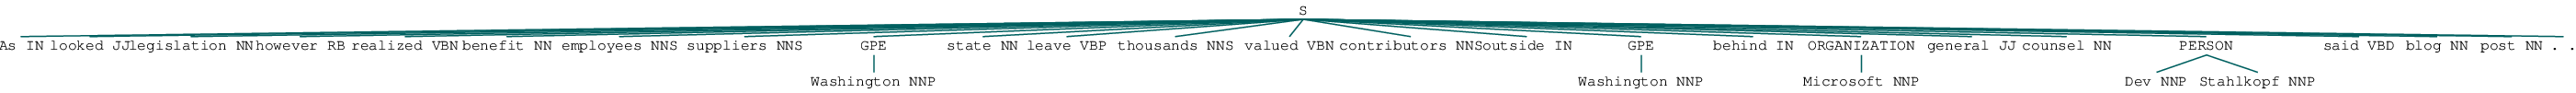

In [113]:
x

In [104]:
def box_plots(data, metric, title, sources_toshow_int):
    plot_data = []
    for source in (list(df.source_name.value_counts().index))[:sources_toshow_int]:
        plot_data.append(data[metric][(data.source_name == source)])
    fig, ax = plt.subplots()
    fig.set_size_inches(40, 20)
    ax.set_title("Distribution of Outlet's article "+title, fontsize=40)
    c = 'blue'
    ax.boxplot(plot_data)
    ax.set_xticklabels((list(df.source_name.value_counts().index))[:sources_toshow_int])
    plt.xticks(fontsize=20, rotation=90)
    plt.yticks(fontsize=20)
    plt.show()

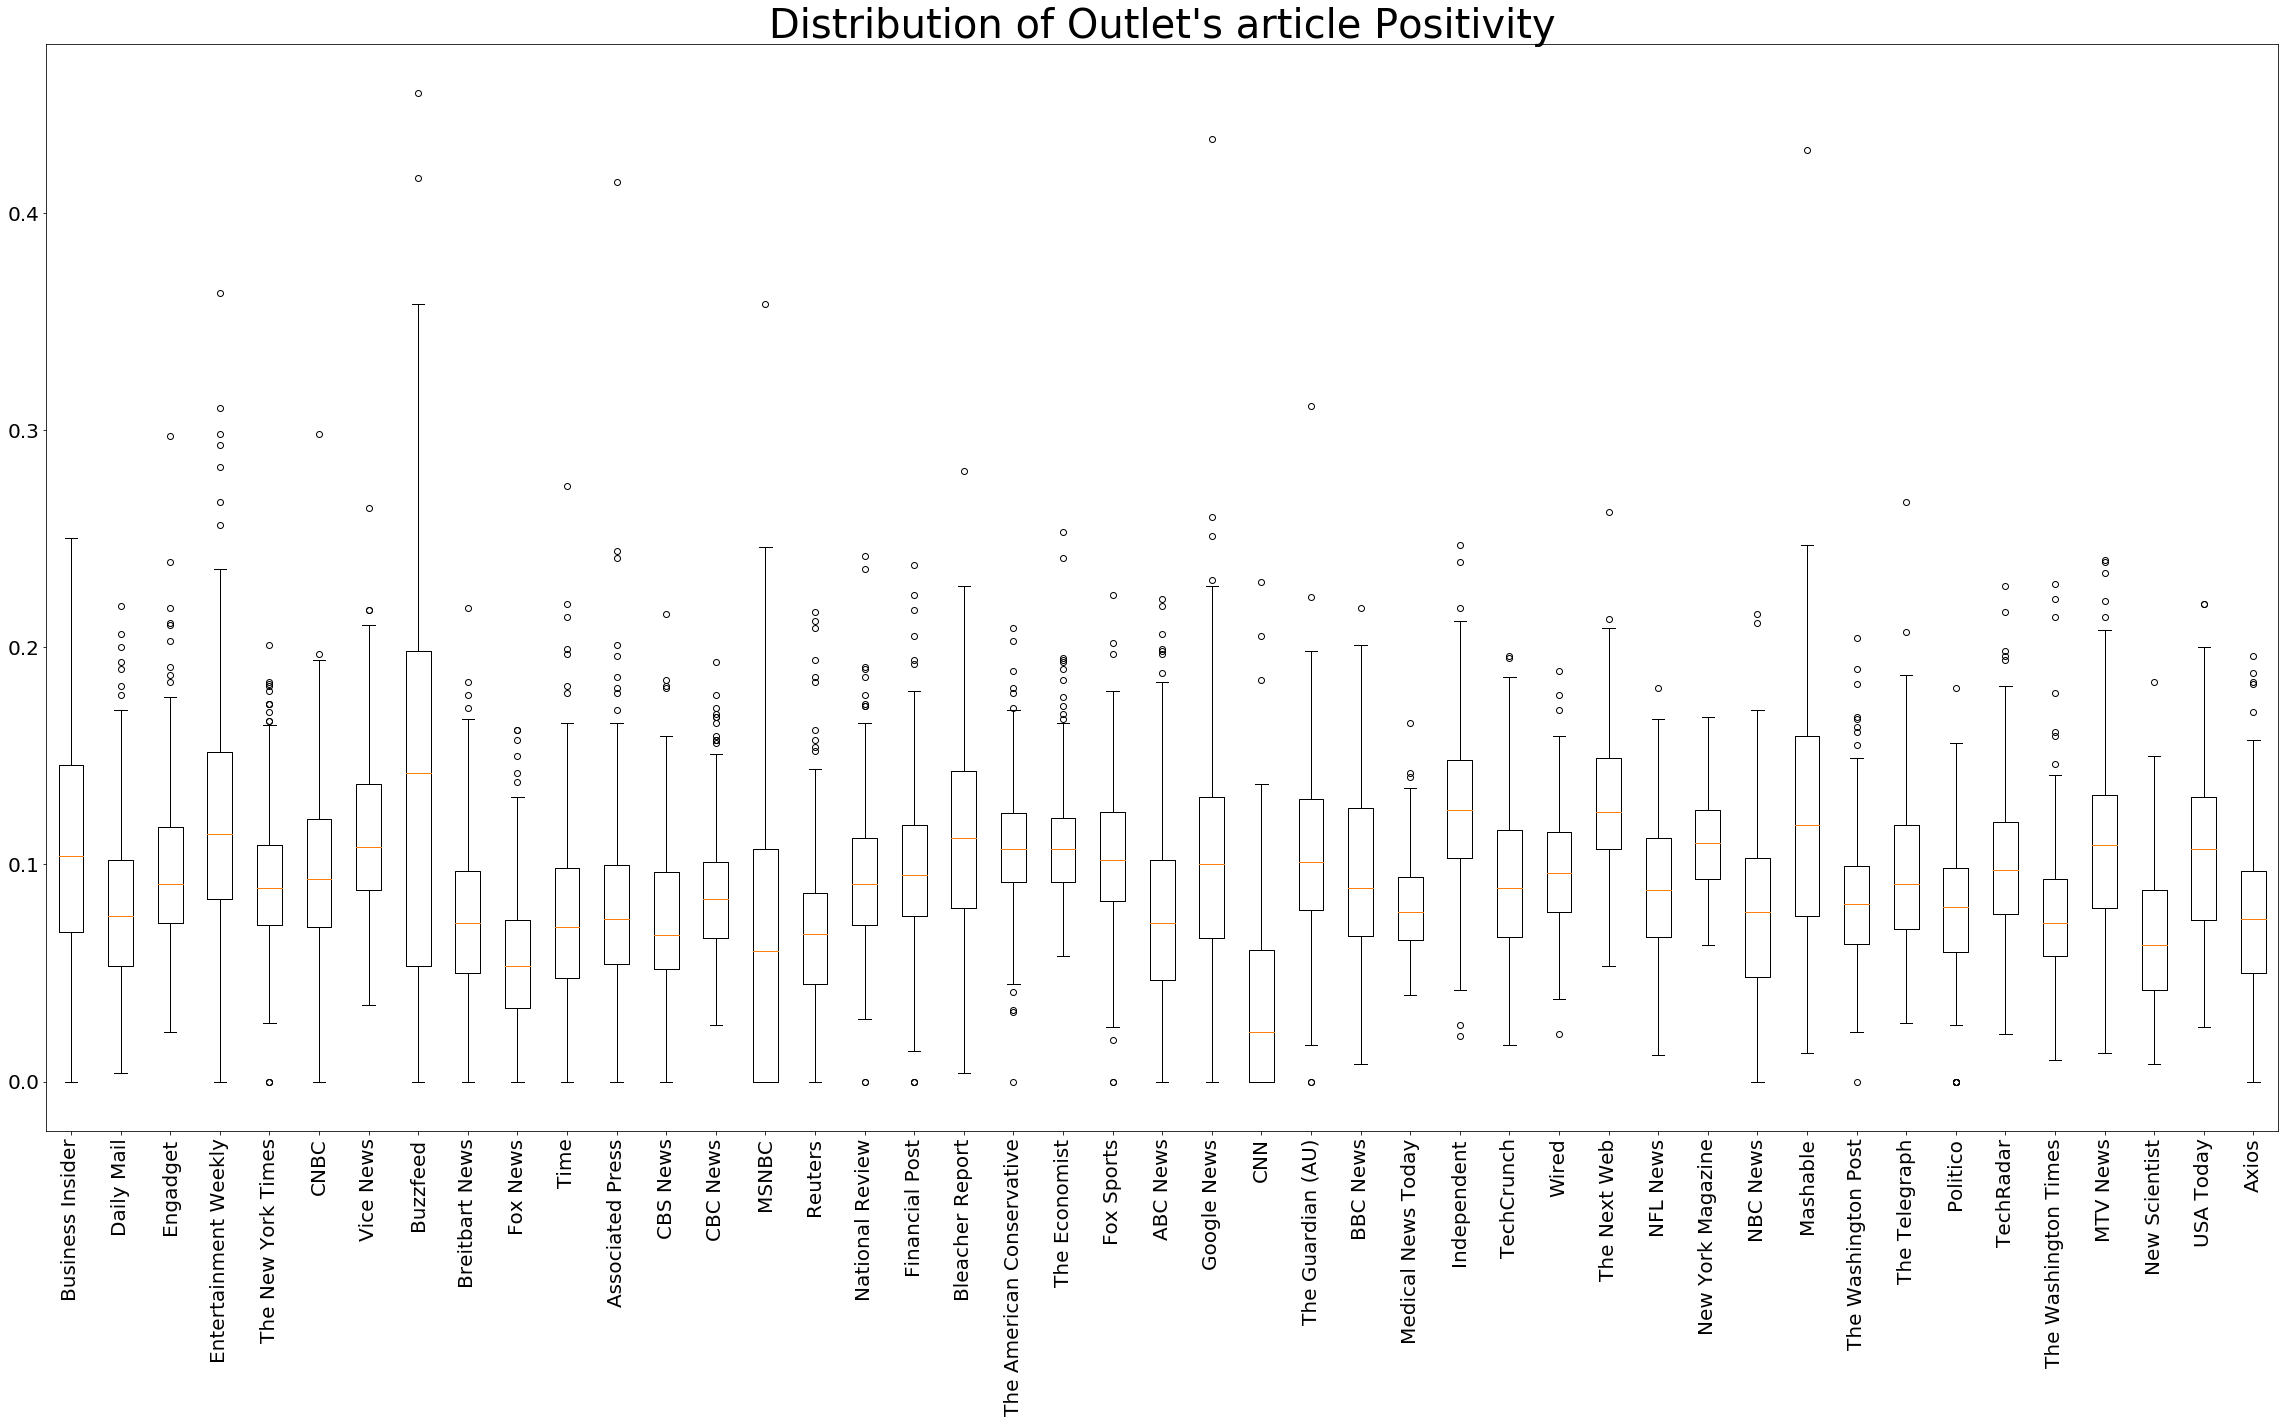

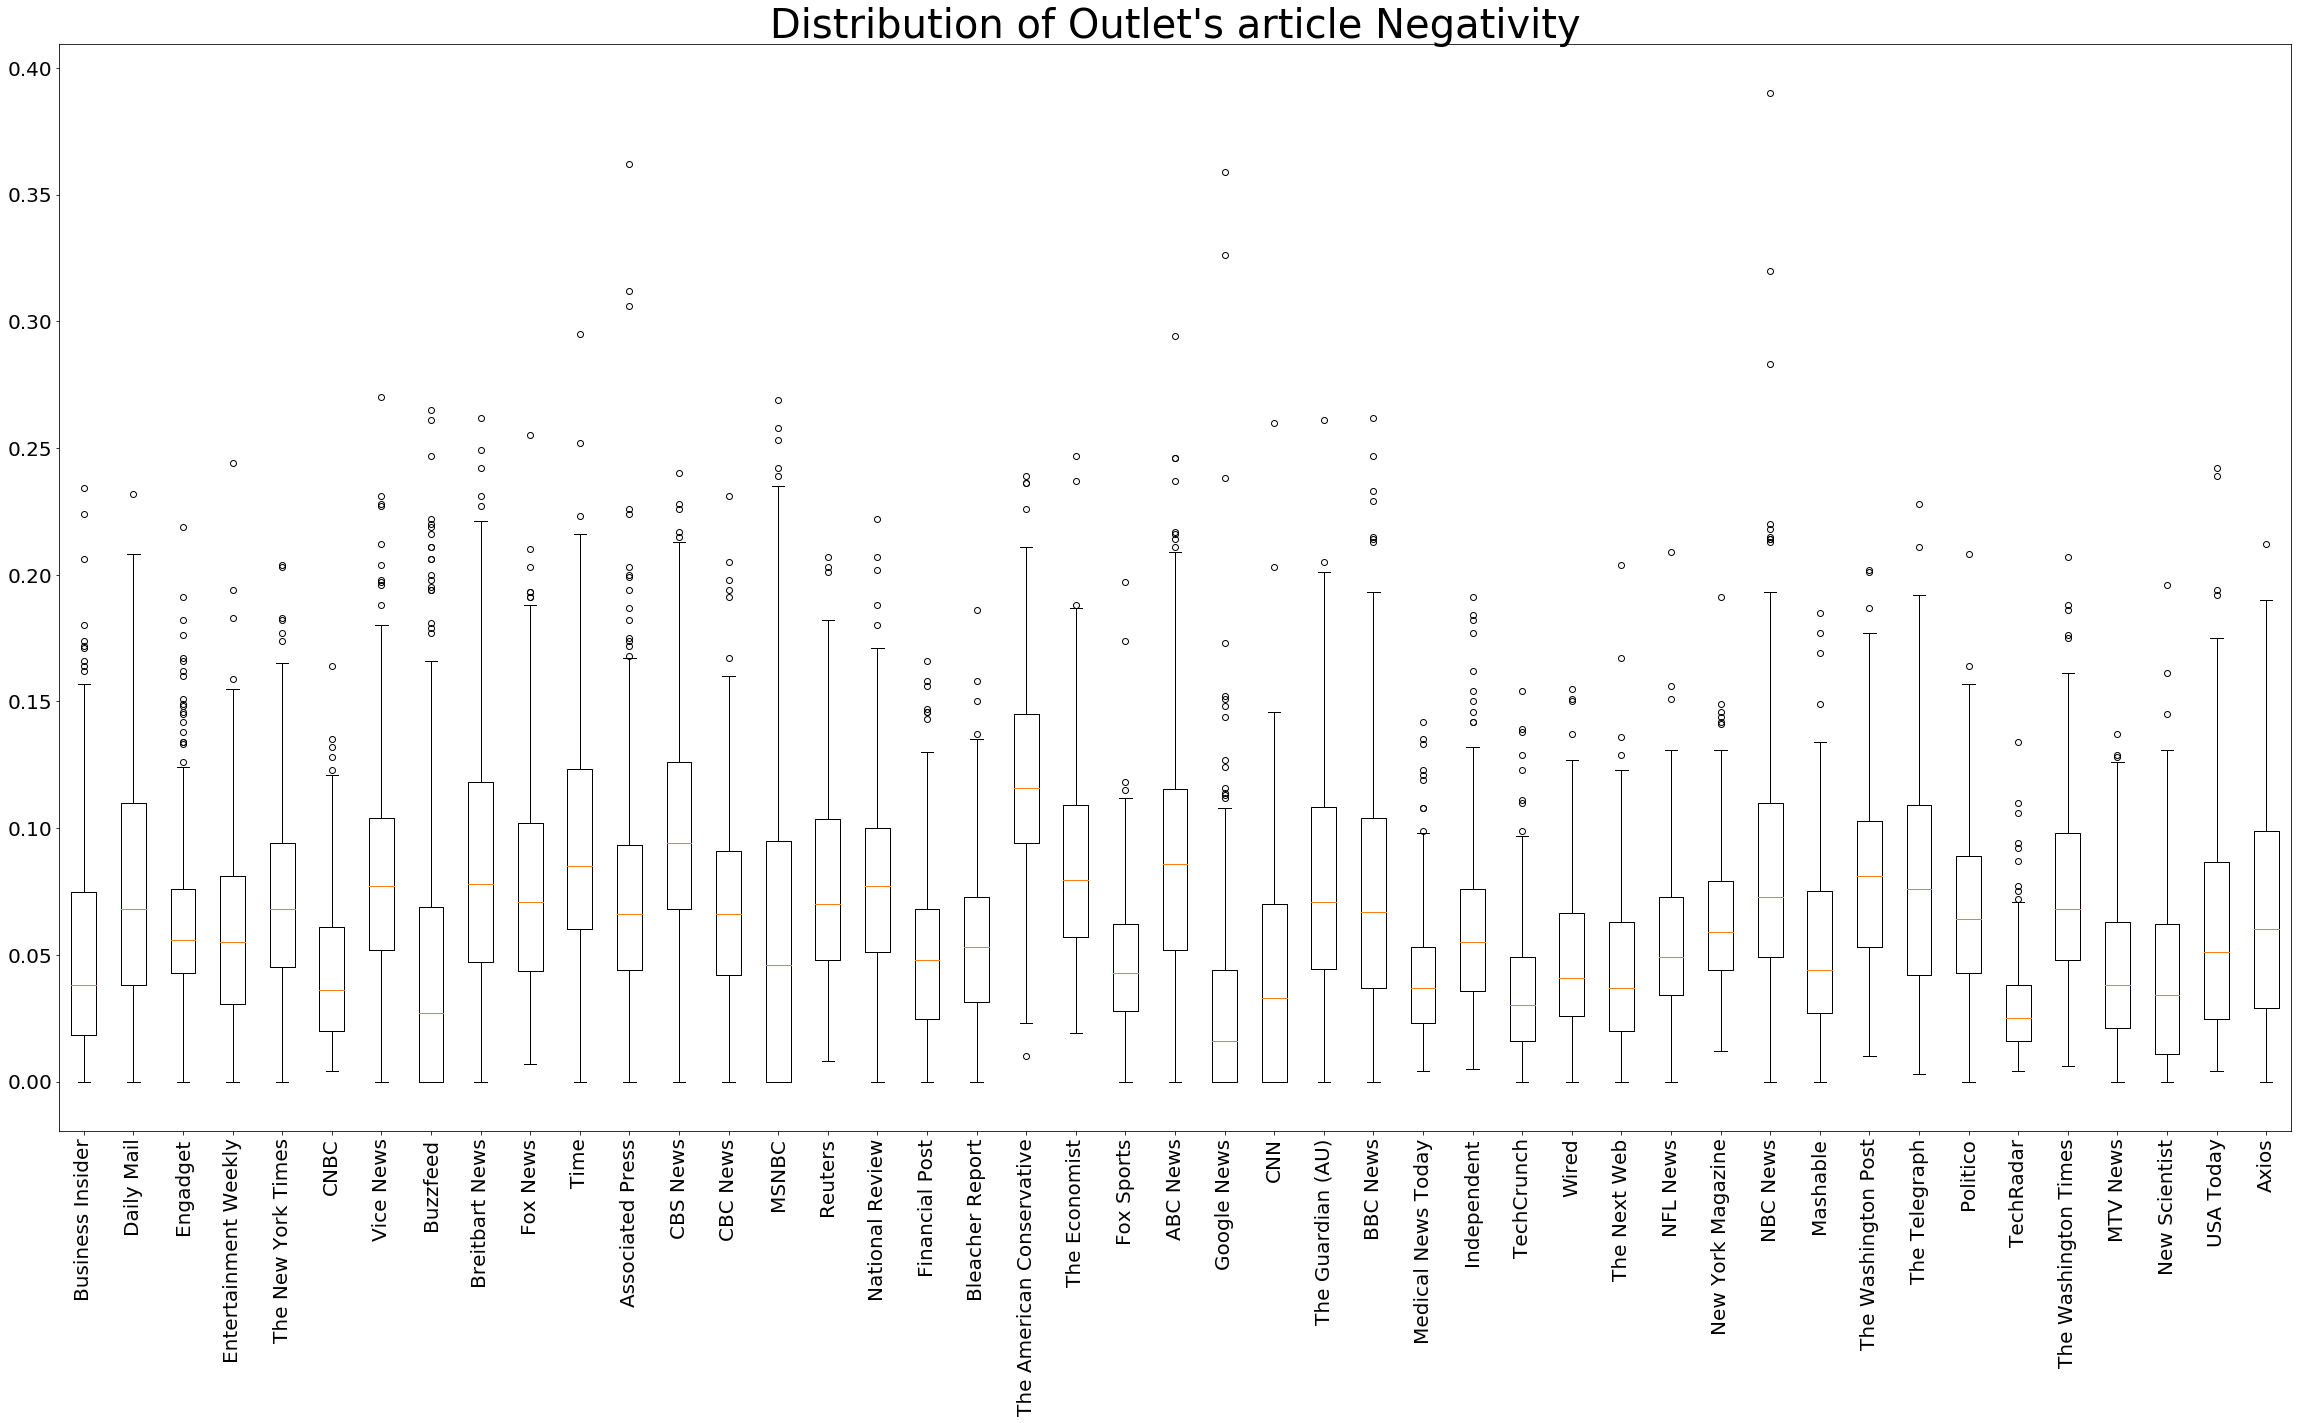

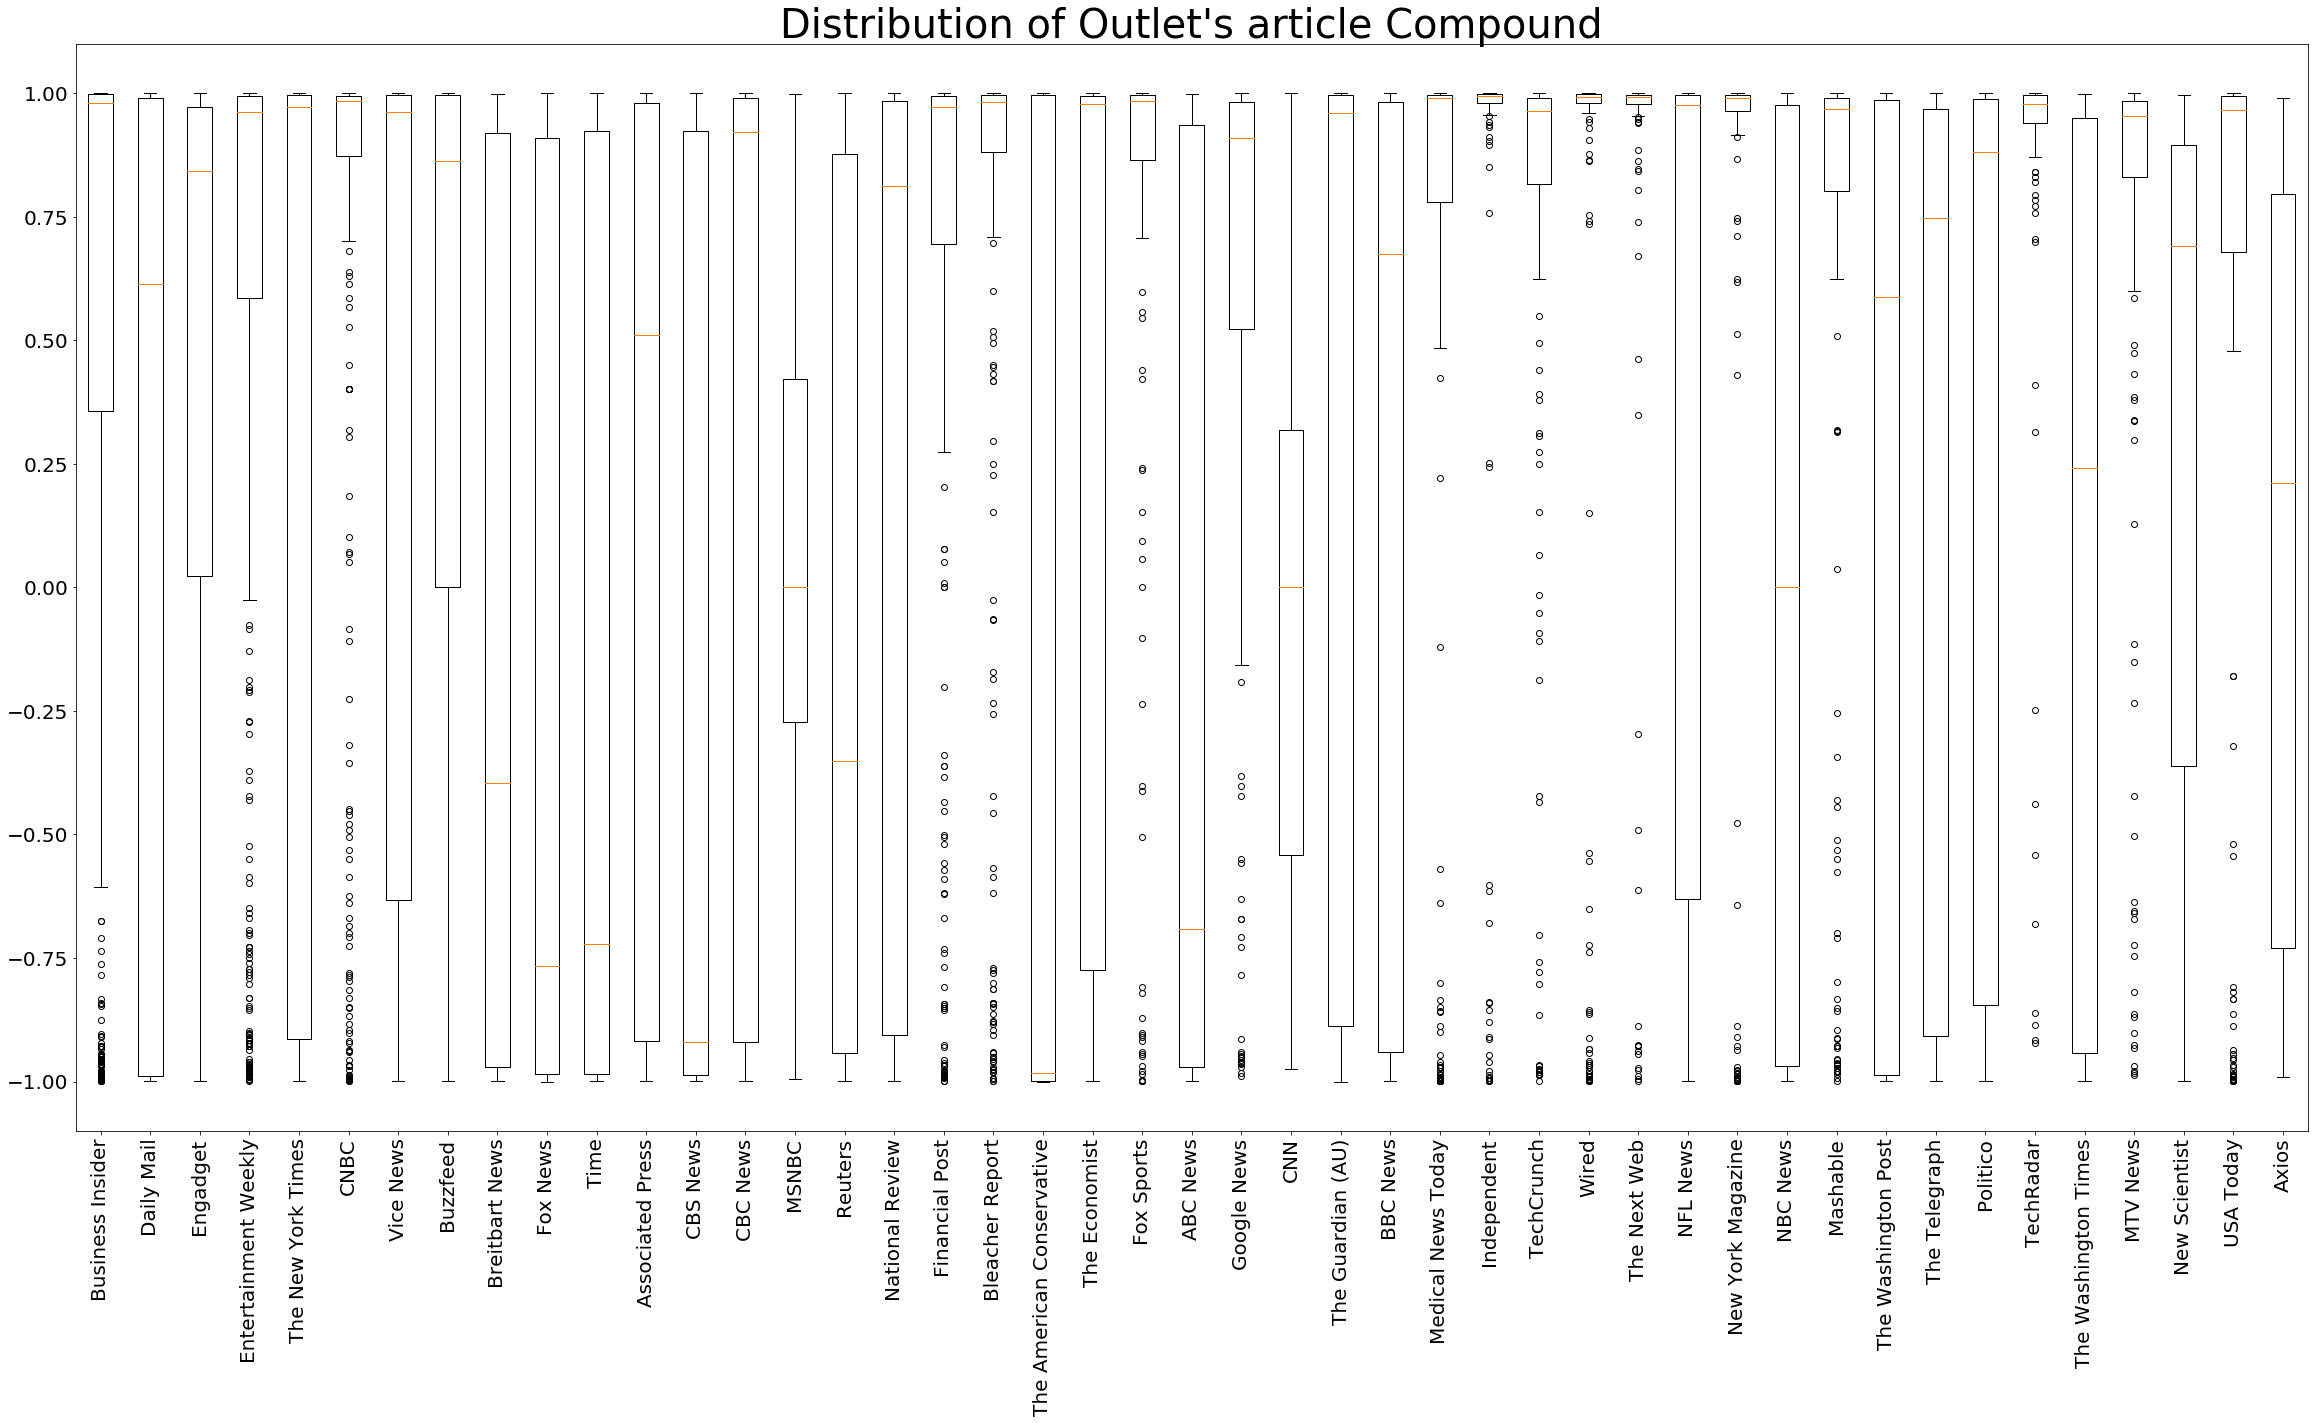

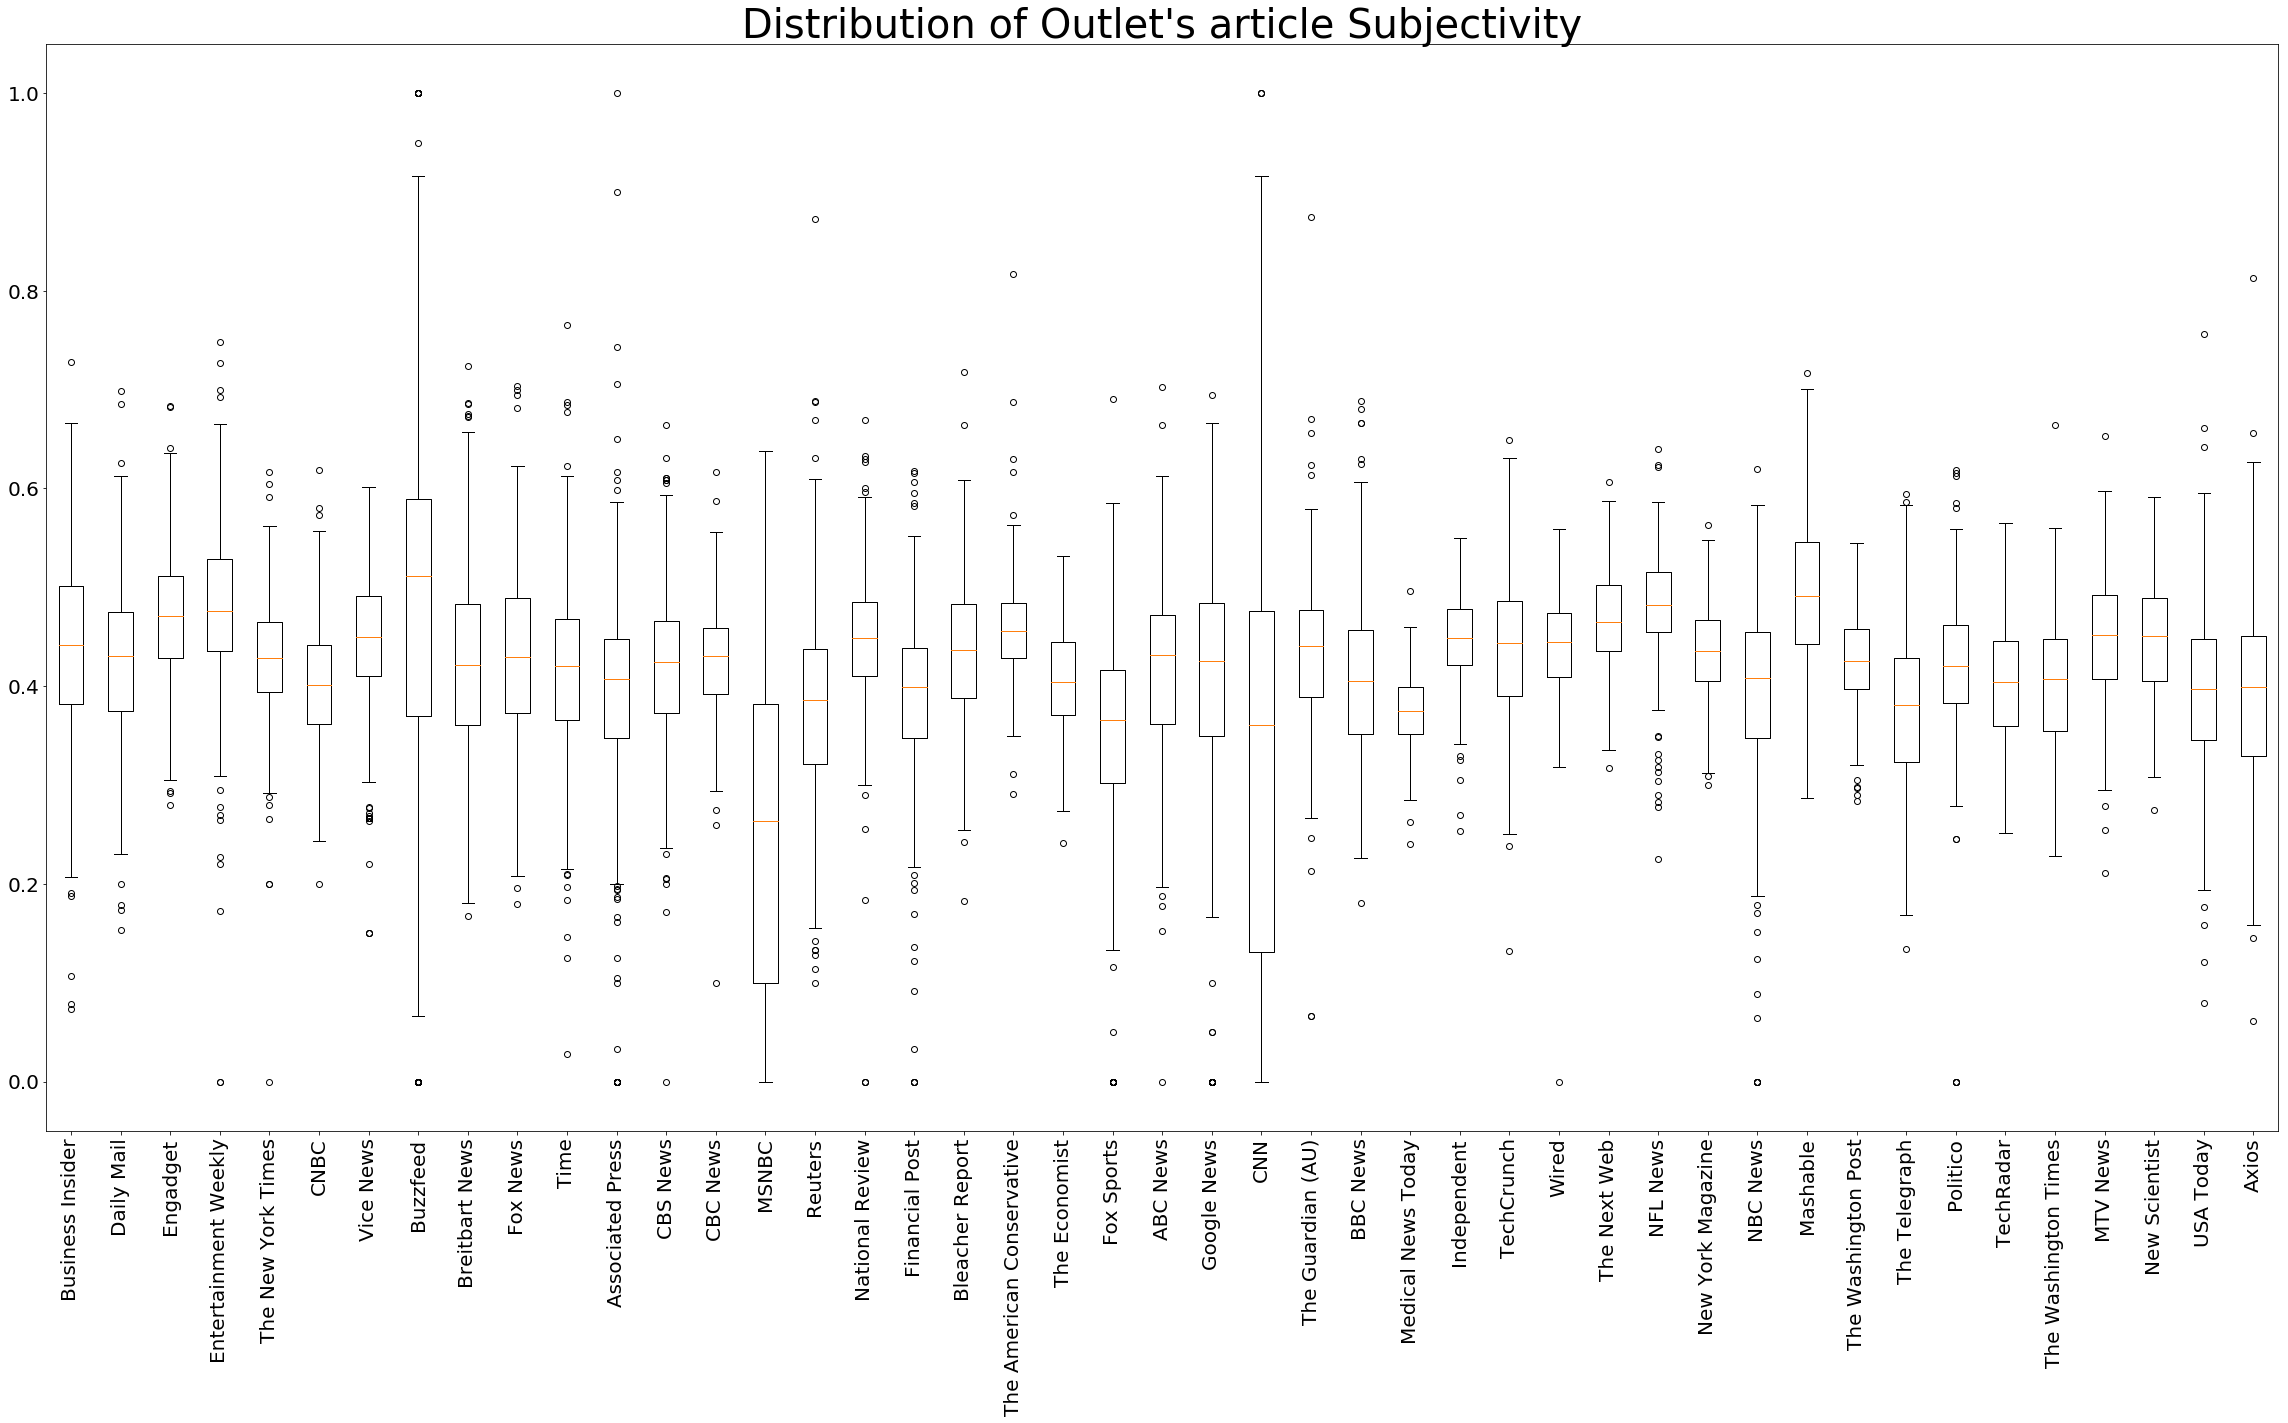

In [105]:
box_plots(df,'pos','Positivity', 45)
box_plots(df,'neg','Negativity', 45)
box_plots(df,'compound','Compound', 45)
box_plots(df,'subjectivity','Subjectivity', 45)